Jagnoor Sandhu | jagnoorsandhu@Hotmail.com

## Project Explanation


### Introduction

In every data analysis project, we need a solid foundation to succeed. Such a foundation consist of specific steps that we need to perform necessary actions, gather the required information, and finally perform a well-structured and holistic data analysis.

#### Problem Identification/ Problem statement

At the first step, we should understand what exactly the problem is, which logics exist behind the problem, how does it affect all the involved parties, and what are clarified points of the main objective in the current data science project.


The main idea of this project is to extract actionable insights from the given data of a company that improves their decision-making process. Furthermore, we want to provide the best possible predictive model for the marketing campaign of their new product which shows if a customer buys the new product or not and how much is the possibility of the purchase.


#### Data Description

The provided data is split into two CSV files containing the training (`train.csv`), and the test data (`test.csv`). The **training date set** includes **31480 records**, containing customer and operational features. Customer features cover master data of customers such as their `age`, `gender`, `occupation`, `marital status`, `education level` and `account balance`, while operational features are related to the last campaign activities including `last campaign result`, `contact date`, `contact duration`, etc. The **test date set** consists of **13732 samples** containing all the provided features in training data except the target value. In general, we have **19 features and one target variable**
that should be predicted. These features can be described as follows:

| Feature                       | Type      | Description                                                |
| :--                           | :--       | :--                                                        |
| id                            | Numerical | record ID                                                  |
| target                        | Nominal   | target value (customer response to the marketing campaign) |
| day                           | Numerical | contact day in previous campaign                           |
| month                         | Nominal   | contact month in previous campaign                         |
| duration                      | Numerical | contact duration in previous campaign                      |
| contactId                     | Numerical | contact ID                                                 |
| age                           | Numerical | age of the customer                                        |
| gender                        | Nominal   | customer gender                                            |
| job                           | Nominal   | customer occupation                                        |
| maritalStatus                 | Nominal   | customer marital status                                    |
| education                     | Nominal   | customer educational degree                                |
| craditFailure                 | Nominal   | if the customer has a default credit                       |
| accountBalance                | Numerical | customer account balance                                   |
| house                         | Nominal   | if the customer owns a house                               |
| credit                        | Nominal   | if the customer has a credit                               |
| contactType                   | Nominal   | contact media                                              |
| numberOfContacts              | Numerical | number of contacts during the current campaign             |
| daySinceLastCampaign          | Numerical | days after the last contact of the previous campaign       |
| numberOfContactsLastCampaign  | Numerical | number of contacts during the previous campaign            |
| lastCampaignResult            | Nominal   | result of the previous campaign                            |


#### Brainstorming

During the brainstorming, we need to ask some interesting questions that we can try to answer during our data analysis process. This step is really useful for providing meaningful and actionable insights for the customer. Here we might ask:

- What are the most important factors that influence the success rate of the campaign?
- What is the amount of correlation between the given features and target value?
- Does the age, gender, education level, and other individual properties of each customer affect the campaign result?
- Does the campaign performance vary in different seasons?
- Does the time of contacts and their frequencies affect the result?
- Is there any correlation between results of the previous campaign and the current one?
- How can we detect our most loyal and most unsatisfied customers?
- Is there any relationship between the contact type and the campaign result?

### Exploratory Data Analysis - Business Intelligence

Exploratory Data Analysis (EDA) is an important primary step in each data analytics process. This step can be difined as the application of different data visualization techniques on the data to achieve all or some of the following objectives.

1. Gaining new insights about the data
2. Identifying important chracteristics of the data
3. Discovering the hidden relations among the data
4. Detecting outliers and anomalies of the data
5. Testing primary assumptions about the data

and much more.

Actually, EDA is an open-ended process where we make plots and perform statistical analysis to explore the data. For example, finding a correlation between two variables (bi-variate analysis). In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.

Let's start our interesting journey with **importing some necessary libraries**:

In [ ]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Truncated floating point formatting
pd.options.display.float_format = '{:.2f}'.format

# turning off the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 14

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.5)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Getting Familiar with the data

### Data manipulation with Pandas:

For the import and manipulation of the data, I use `pandas` package due to the following reason:

1.  Pandas has a well-designed data structure called *dataframe* with column names that can help a lot in keeping track of our data.  
2.  The provided training data is a kind of heterogeneous data including nummeric as well as categorial values. With a pandas dataframe, we are able to work with different data types (float, int, string, datetime, etc) all in one place.
3.  Pandas has some very useful built-in functionalities for a lot of common data-processing applications. For example, easy group by syntax, easy joins, etc.
4.  Pandas has a good IO capabilities.

### Data visualization with Seaborn & Plotly:

For Data visualization, I use `seaborn` & `plotly` packages of Python. These packages provide an API on top of traditional *Matplotlib* package that offers simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames. In addition, `plotly` is an interactive, open-source, and browser-based graphic library for Python that provides over 30 chart types, including scientific charts, 3D graphs, statistical charts, SVG maps, financial charts that can be viewed in Jupyter notebooks and standalone HTML files.

In [ ]:
# Loading the provided training data from the csv file into a pandas dataframe (df)
Data = pd.read_csv('../input/marketing-campaign-analysis-data/train.csv')
# take a look at the first five rows of the imported data
Data.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown


As the first step in our Exploratory Data Analysis (EDA) process, `dataframe.info()` method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values.

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

As can be seen, the training data contains **31480 samples** and **20 features** in which **9 features** have **numerical** values and the rest (**11 features**) are **nominal**. Since we are going to work with mathematical models, we should work only with numbers. So, the values of all the **nominal (object)** columns should be converted into numerical values. But, at the moment, such a conversion, drastically decrease the readabilirty of our diagrmas during the EDA process. Therefore, we should postpone this conversion to the **preprocessing step** that takes place after the EDA process and just before feeding the data to the models.

In addition, the result of the `info()` function shows `daySinceLastCampaign ` column is the only column that has less number of values (**5738 vlaues**). So, we can conclude this column has **31480-5738 = 25742 missing values**:

In [ ]:
# take a look to see how is the situation of missing data:
missing_data = pd.DataFrame({'total_missing': Data.isnull().sum(), 'perc_missing': (Data.isnull().sum()/len(Data))*100}).round(2)

# Print some summary information
print ("Our dataframe has " + str(Data.shape[1]) + " column(s).\n"
        "There is/are " + str(len(missing_data.loc[missing_data['total_missing'] > 0])) +
              " column(s) that has/have missing values.")
missing_data

Our dataframe has 20 column(s).
There is/are 1 column(s) that has/have missing values.


,total_missing,perc_missing
id,0,0.00
target,0,0.00
day,0,0.00
month,0,0.00
duration,0,0.00
contactId,0,0.00
age,0,0.00
gender,0,0.00
job,0,0.00
maritalStatus,0,0.00


In [ ]:
Data[Data['daySinceLastCampaign'].isnull()]['numberOfContactsLastCampaign'].unique()

array([0])

As can be seen above, for customers whose `daySinceLastCampaign` column is `Null`, the value of the `numberOfContactsLastCampaign` columns is **exclusively zero**. It means, these customers are customers to which we made no contact in the previous campaign. We can replace these `Null` values with a more meaningful numeric value such as `-1` that can be interpreted as "**no contact in the previous campaign**":

In [ ]:
Data['daySinceLastCampaign'].fillna(-1, inplace=True)

Now, evrything seems perfect:

In [ ]:
missing_data = pd.DataFrame({'total_missing': Data.isnull().sum(),
                             'perc_missing': (Data.isnull().sum()/len(Data))*100}).round(2)
missing_data

,total_missing,perc_missing
id,0,0.00
target,0,0.00
day,0,0.00
month,0,0.00
duration,0,0.00
contactId,0,0.00
age,0,0.00
gender,0,0.00
job,0,0.00
maritalStatus,0,0.00


### Label balance check:

At this point, we need to check how is the distribution of our labels among the training data. It may have a big influence on the performance of our models as it will be discussed later.

In [ ]:
# Plotting the distribution of labels
Labels = ['Campaign Success', 'Campaign Failure']

successes = len(Data[Data['target'] == 'yes'])
failures = len(Data[Data['target'] == 'no'])

s_color = 'green'
f_color = 'red'

Values = [successes, failures]

fig = px.pie(Data,
             values=Values,
             color_discrete_sequence=[f_color, s_color],
             hover_name = Labels,
             names = Labels,
             title= 'Label distribution among the training data',
             hole = 0.5
            )

fig.show()


It seems there is an **imbalance** among the training data with respect to the target value. In other words, there are many observations of **No Events (Campaign Failures)** and only a few observations of **Yes Event (Campaign Successes')**. So, we should consider this imbalance in our models and approaches.

Now, we can check the mean value of each feature w.r.t. our labels to see the difference between two groups of customers in each feature:

In [ ]:
# Grouping the data based on the 'target value' into 'positive' and 'negative' customers
# and taking the maen value of nummerical features w.r.t. those groups
numericFeatures = ['day',
                   'duration',
                   'age',
                   'accountBalance',
                   'numberOfContacts',
                   'daySinceLastCampaign',
                   'numberOfContactsLastCampaign']

numericFeaturesPlusTarget = numericFeatures + ['target']

Data[numericFeaturesPlusTarget].groupby('target').mean()

,day,duration,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign
target,,,,,,,
no,15.90,221.60,40.83,1287.47,2.87,36.42,0.51
yes,15.02,535.54,41.73,1807.03,2.13,68.99,1.16


So, we can see:

1. The average call duration of positive customers (535.54) is longer than the average duration of negative customers (221.60).
2. The average age of the positive customers (41.73) is slightly higher than the aveage age of negative ones (40.83).
2. The average account balance of the positive customers (1807.03) is higher than the average account balance of the negative customers (1287.47).
3. It is more likely to receive a positive answer when the time gap between the current and the previous campaign grows.
4. We called positive customers more frequently in the last campaign.
5. We called negative customers more frequently in the current campaign (possibly due to the aforementioned imbalance of the training data).


We can do this for other features, for example by grouping on `maritalStatus` and `gender`, we are able to observe the difference between customers w.r.t. that specific feature:

In [ ]:
# checking customers' properties w.r.t. their marital status
numericFeaturesPlusMS = numericFeatures + ['maritalStatus']
Data[numericFeaturesPlusMS].groupby('maritalStatus').mean()

,day,duration,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign
maritalStatus,,,,,,,
divorced,15.80,265.61,45.92,1180.75,2.66,41.16,0.54
married,15.86,254.00,43.37,1414.91,2.86,38.04,0.57
single,15.67,265.25,33.76,1274.06,2.66,44.57,0.62


Here, from the field `numberOfContactsLastCampaign`and its reported statistical values, we can conclude the majority of the previous campaign contacts were toward single customers, while the provided information of the `numberOfContacts` column show, in the current campaign, we mostly contact married customers.

Next, let's see if there is a meaningfull correlation between **(`contactType`)** of the customers and their feedback to the campaign:

In [ ]:
cellphone = Data[Data['contactType'] == 'cellPhone']
G0 = cellphone['target'].value_counts().sort_index().tolist()

landline = Data[Data['contactType'] == 'landline']
G1 = landline['target'].value_counts().sort_index().tolist()

Groups = sorted(Data['target'].unique().tolist())

fig = go.Figure(data=[
    go.Bar(name='cellphone', x= Groups, y=G0, marker_color='#1a8cff'),
    go.Bar(name='landline' , x= Groups, y=G1, marker_color='#884dff')
])

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = Groups,
        ticktext = ['Campaign Failures', 'Campaign Successes']),
        xaxis_title_text='target', # xaxis label
        yaxis_title_text='Number of Contacts', # yaxis label
        barmode='group' # change the barchart mode
    )

fig.show()

As you can see, **we contacted customers much more through their cellphones (blue bars) than calling their landline numbers (purple bars)**. So, to fairly answer the previous question, we need to extract the **success rate of each contact type** instead:

In [ ]:
cellphone_successes  = len(cellphone[cellphone['target'] == 'yes'])
cellphone_failures = len(cellphone[cellphone['target'] == 'no'])

landline_successes  = len(landline[landline['target'] == 'yes'])
landline_failures = len(landline[landline['target'] == 'no'])

fig = make_subplots(rows=1,
                    cols=2,
                    specs=[[{'type':'domain'},{'type':'domain'}]],
                    column_titles=['Campaign success and failure rates for each contact type'])

fig.add_trace(
    go.Pie(labels=['Campaign Success', 'Campaign Failure'], values=[cellphone_successes, cellphone_failures],
           title='<b>cellphone</b>', hole=0.3, name = 'cellphone'), row=1, col=1)
fig.update_traces(textfont_size=20, marker=dict(colors=['green', 'red']))

fig.add_trace(
    go.Pie(labels=['Campaign Success', 'Campaign Failure'], values=[landline_successes, landline_failures],
           title='<b>landline</b>', hole=0.3, name = 'landline'), row=1, col=2)
fig.update_traces(textfont_size=20,
                  marker=dict(colors=['green', 'red']))

fig.show()

So, as you can see, despite of our primary assumption based on previous diagram, the above charts illustrate there is no meaningfull difference between the success and failure rates of campaign with respect to the contact type.

Let's see the influence of the customers' education on the campaign result:

In [ ]:
se_successes  = len(Data[(Data['target'] == 'yes') & (Data['education'] == 'secondarySchool')])
se_failures  = len(Data[(Data['target'] == 'no') & (Data['education'] == 'secondarySchool')])

high_successes  = len(Data[(Data['target'] == 'yes') & (Data['education'] == 'highSchool')])
high_failures  = len(Data[(Data['target'] == 'no') & (Data['education'] == 'highSchool')])

uni_successes  = len(Data[(Data['target'] == 'yes') & (Data['education'] == 'uniGraduated')])
uni_failures  = len(Data[(Data['target'] == 'no') & (Data['education'] == 'uniGraduated')])

fig = make_subplots(rows=1,
                    cols=3,
                    specs=[[{'type':'domain'},{'type':'domain'}, {'type':'domain'}]],
                    column_titles=['           Customer\'s education influence on the campaign result'])

fig.add_trace(
    go.Pie(labels=['Campaign Success', 'Campaign Failure'], values=[se_successes, se_failures],
           title='<b>secondary school</b>', hole=0.3, name = 'secondary school'), row=1, col=1)


fig.add_trace(
    go.Pie(labels=['Campaign Success', 'Campaign Failure'], values=[high_successes, high_failures],
           title='<b>highschool</b>', hole=0.3, name = 'high school'), row=1, col=2)


fig.add_trace(
    go.Pie(labels=['Campaign Success', 'Campaign Failure'], values=[uni_successes, uni_failures],
           title='<b>uni graduate</b>', hole=0.3, name = 'uni graduated'), row=1, col=3)
fig.update_traces(textfont_size=20,
                  marker=dict(colors=['green', 'red']))

fig.show()

Now we can see **the campaign success rate among the customers with university degrees is higher than other two groups**. So we may conclude the level of education has an influence on the campaign result.

Next, we investigate the influence of the time of the year on the campaign result:

In [ ]:
feature = 'month'

temp= pd.crosstab(Data['month'],Data['target'])
temp['idx'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
temp.sort_values(by=['idx'], inplace=True)

mo_successes =  temp['yes'].values.tolist()
mo_failures  =  temp['no'].values.tolist()
mo_names     =  temp.index.tolist()

fig = go.Figure(data=[
    go.Bar(name='Success', x = mo_names, y = mo_successes, marker_color= 'green'),
    go.Bar(name='Failure' , x = mo_names, y = mo_failures, marker_color= 'red')
]
               )

fig.update_layout(
    title = 'Campaign success/failure quantities during months of the year',
    xaxis = dict(
        tickmode = 'array',
        tickvals = mo_names,
        ticktext = mo_names),
        xaxis_title_text='month', # xaxis label
        yaxis_title_text='Number of contacts', # yaxis label
        barmode='group' # change the barchart mode
    )

fig.show()

Looking at this bar chart, we can see the highest values belong to **may**, while the lowest values can be seen in **December**. Since, the contact distribution is not uniform along the year, again we should <u>normalize the result</u> for a fair comparison of the success rate in different months.

In [ ]:
'''
Normalizing formula:
For each month:
yes = yes / (yes+no)
no  = no  / (yes+no)
'''
temp = temp.div(temp.sum(1).astype(float), axis=0)

mo_successes =  temp['yes'].values.tolist()
mo_failures  =  temp['no'].values.tolist()

fig = go.Figure(data=[
    go.Bar(name='Success', x = mo_names, y = mo_successes, marker_color= 'green'),
    go.Bar(name='Failure' , x = mo_names, y = mo_failures, marker_color= 'red')
]
               )

fig.update_layout(
    title = 'Campaign success/failure normalized rates during months of the year',
    xaxis = dict(
        tickmode = 'array',
        tickvals = mo_names,
        ticktext = mo_names),
        xaxis_title_text='month', # xaxis label
        yaxis_title_text='Campaign success/failure rates', # yaxis label
        barmode='group' # change the barchart mode
    )

fig.show()

Now, we have a completely different view on the success rate of months. Although **May** has the highest number of contacts, the success rate of **May** is the lowest one (**6.7 %**). On the other hand, for months in which we have the lowest number of contacts (e.g. **Mars**, **September**, **October** and **December**), the success rate is high.


Now, it is a good idea to see, how is the age distribution of the customers:

In [ ]:
def plot_histogram(data, col, color, title, shade=False, shade_options=[]):
    '''
    This fuctions plot the histogram of the [col] feature of the [data] data frame in [color] color with the [title] title
    '''
    fig = go.Figure()
    fig.add_trace(go.Histogram(
        x=data[col],
        name=col,
        xbins=dict(
            start=data[col].min(),
            end=data[col].max(),
            size=1
        ),

        marker_color=color,
        opacity=0.75,
    ))

    fig.update_layout(
        title_text= title, # title of plot
        xaxis_title_text=col, # xaxis label
        yaxis_title_text='Quantity', # yaxis label
        bargap=0.2, # gap between bars of adjacent location coordinates
    )

    if shade:
        fig.add_vrect(
            x0=shade_options[0], x1=shade_options[1],
            fillcolor=shade_options[2], opacity=0.5,
            layer="below", line_width=0,
            )
    fig.update_layout(xaxis_range=[data[col].min(),data[col].max()]) # to force all figures to have equal x-axis range
    fig.show()

plot_histogram(Data, 'age', 'navy', 'Age Distribution of customers:', shade=True, shade_options=[30, 61, 'dimgray'])

As illustrated, the age distribution has a *right (positive) skewed* shape that does not show a normal distribution. It is also clear that the <u>majority of customers are **30-60 years old**</u>. Let's take a look at a more accurate age distribution in which we can see its correlation with Campaign result as well:

In [ ]:
import plotly.figure_factory as ff

feature = 'age'
binsize = 1
rug = False
curve = True

successes = Data[Data['target'] == 'yes'][feature]
failures = Data[Data['target'] == 'no'][feature]

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis_title_text = feature + ' Distribution',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates over the age of customers'
    )


fig.show()

As can be seen in the aboved diagram, changes in the probability density (KDE curves) of both success (green) and failure (red) rate have almost the same pattern for the customers with the age under 60 years. **By the way, the rate of success is higher than the failure rate for the customers with the age under 30 and higher than 60 years**. So, **it can be suggested to more concentrate on the customer younger than 30 years old or older than 60 years old to increase the success rate of the campaign**.

## Adding the 'Day' attribute to the data:

In order to analyze the data in the shape of a time series, feature engineering is necessary to add a continuous time variable to the data. To this aim, two features of **day** and **month** are used to generate the new feature of **dayNum** which is the sequential number of the day in the year. For example, for August 13th, we should add the number of the days in all the previous months (212) to the date: 212+13 = 225.

Doing so, we can use the **dayNum** feature to illustrate the campaign trend along the year:

In [ ]:
# Acceptance/Rejection trends along the year

Data['dayNum'] = Data['day']

months = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days   = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

for m, d in zip(months, days):
    Data['dayNum'] = np.where(Data['month'] == m, Data['day'] +  d, Data['dayNum'] )

In [ ]:
feature = 'dayNum'
binsize = 1
rug = False
curve = True

months = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days   = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

x_tick_location = [1] + days + [365]
x_tick_labels = [mon for mon in months]
x_tick_labels = ['jan'] + x_tick_labels + ['']

successes = Data[Data['target'] == 'yes'][feature]
failures = Data[Data['target'] == 'no'][feature]

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates along the year'
    )


fig.show()

In [ ]:
len(successes)

3700

As it can be seen, our time series does not have an obvious trend, while a weekly seasonality is visible in the form of the campaign stops on weekends that is more observable between weeks with the high number of contacts (e.g. August weeks). Again, it is also visible, when the number of contacts decreases, the campaign success rate (green curve) goes beyond the campaign failure rate (red curve) for example during March, April, September, October, and December. The possible reason behind such a behaviour could be that marketing agents are mainly concentrated on loyal customers during these months.

In addition, the number of campaign contacts increases significantly during February, May, June, July, August and the *Black Friday* week in November in which the campaign failure rate (red curve) surpasses the campaign success rate (green curve). As described earlier, this can be due to a change in marketing strategy (contacting new customers more than the loyal ones to attract more new customers) during those periods.   

For a better visualization of these insights, I divided the year into 4 quarters and showed the result for each quarter separately.

### Campaign Cumulative Flow Diagram(CFD)

In this part, the Cumulative Flow Diagram (CFD) of the both success and failure rates of the campaign is used as a valuable tool for tracking the performance of the campaign:

In [ ]:
# cumulative results of the campaign along the year

months = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days   = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

successes = Data.loc[Data['target'] == 'yes'][['dayNum', 'target']]
s_acc = successes.groupby('dayNum').count()
s_acc['yes'] = s_acc['target'].cumsum()
s_acc['dayN'] = s_acc.index

failures = Data.loc[Data['target'] == 'no'][['dayNum', 'target']]
f_acc = failures.groupby('dayNum').count()
f_acc['no'] = f_acc['target'].cumsum()
f_acc['dayN'] = f_acc.index

acc= pd.merge(f_acc, s_acc, how='inner', on='dayN')

successes = acc['yes'].fillna(0).astype('int16')
failures = acc['no'].fillna(0).astype('int16')
dayNums = acc['dayN'].astype('int16')

x_tick_location = [min(dayNums)] + days + [365]
x_tick_labels = [mon for mon in months]
x_tick_labels = ['jan'] + x_tick_labels + ['']


hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = go.Figure(data=[
    go.Line(name='Success', x= dayNums, y=successes, line=dict(color='green')),
    go.Line(name='Failure', x= dayNums, y=failures, line=dict(color='red'))
]
               )


fig.update_layout(
        xaxis = dict(
        #tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'campaign success/failure quantity',
        title = 'Cumulative campaign success/failure rates along the year'
    )


fig.show()

/opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Now, we can see the cumulative illustration of the campaign results along the year showing how fast the number of negative feedbacks grows in comparison with the positive answers. The number of negative results red line) is growing drastically at the high seasons of the campaign (e.g. during May, June and Black friday week of November), while its growth rate is constant when the campaign subsides (e.g. during March, April and October) . On the other hand, the growth speed of the positive feedbacks (the green line) is somehow gradual along the year.

The shape of this diagram is a measure of the campaign performance. The current situation shows a negative balance in the campaign result. The outcome of any successful attempt to change this situation should be visible in this diagram as the increase of the success quantity (green line) and the decrease of the failure quantity (red line) in the future.

**It is worth mentioning that the negative balance of the campaign does not mean the campaign has a negative influence on the sale of the product. The positive feedbacks of the customers in the campaign will definitely increase the sell. But the most important thing about the campaign is the *expected outcome* that can be defined as the expected growth in selling the product which is unknown in the problem description.**

In the following steps, this information is provided for all the year quarters in more details separately:

In [ ]:
Q_months = ['jan'] + months[0:2]
Q_days = [min(dayNums)] + days[0:2]
Quarter = Data.loc[Data['month'].isin(Q_months)]

x_tick_location = Q_days
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'jan') |
                                              (Data['month'] == 'feb') |
                                              (Data['month'] == 'mar'))]['dayNum']

failures  = Data[(Data['target'] == 'no' ) & ((Data['month'] == 'jan') |
                                              (Data['month'] == 'feb') |
                                              (Data['month'] == 'mar'))]['dayNum']

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates during the first quarter of the year'
    )


fig.show()

# cumulative results of the campaign along the first quarter of the year

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'jan') |
                                              (Data['month'] == 'feb') |
                                              (Data['month'] == 'mar'))][['dayNum', 'target']]

s_acc = successes.groupby('dayNum').count()
s_acc['yes'] = s_acc['target'].cumsum()
s_acc['dayN'] = s_acc.index

failures = Data[(Data['target'] == 'no')  & ((Data['month'] == 'jan') |
                                             (Data['month'] == 'feb') |
                                             (Data['month'] == 'mar'))][['dayNum', 'target']]

f_acc = failures.groupby('dayNum').count()
f_acc['no'] = f_acc['target'].cumsum()
f_acc['dayN'] = f_acc.index

acc= pd.merge(f_acc, s_acc, how='inner', on='dayN')

successes = acc['yes'].fillna(0).astype('int16')
failures = acc['no'].fillna(0).astype('int16')
dayNums = acc['dayN'].astype('int16')


hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = go.Figure(data=[
    go.Line(name='Success', x= dayNums, y=successes, line=dict(color='green')),
    go.Line(name='Failure', x= dayNums, y=failures, line=dict(color='red'))
]
               )


fig.update_layout(
        xaxis = dict(
        #tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'campaign success/failure quantity',
        title = 'Cumulative campaign success/failure rates during the first quarter of the year'
    )


fig.show()

In the first quarter of the year, the campaign has been started in the second week of January. The high season of the campaign in this quarter begins in the final week of January and lasts around 3 weeks. In other weeks of the quarter, the campaign activities subsides.

The cumulative diagram shows the balance of the campaign result was positive in first three weeks of January before the high season of the campaign. But this balance turned to negative when campaign activities grows. So, applying more efficient customer intelligent strategies during the campaign may improve the obtained result.

In [ ]:
Q_months = months[2:5]
Q_days = days[2:5]
Quarter = Data.loc[Data['month'].isin(Q_months)]

x_tick_location = Q_days
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'apr') |
                                              (Data['month'] == 'may') |
                                              (Data['month'] == 'jun'))]['dayNum']

failures  = Data[(Data['target'] == 'no' ) & ((Data['month'] == 'apr') |
                                              (Data['month'] == 'may') |
                                              (Data['month'] == 'jun'))]['dayNum']

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates during the second quarter of the year'
    )


fig.show()

# cumulative results of the campaign along the first quarter of the year

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'apr') |
                                              (Data['month'] == 'mai') |
                                              (Data['month'] == 'jun'))][['dayNum', 'target']]

s_acc = successes.groupby('dayNum').count()
s_acc['yes'] = s_acc['target'].cumsum()
s_acc['dayN'] = s_acc.index

failures = Data[(Data['target'] == 'no')  & ((Data['month'] == 'apr') |
                                             (Data['month'] == 'mai') |
                                             (Data['month'] == 'jun'))][['dayNum', 'target']]

f_acc = failures.groupby('dayNum').count()
f_acc['no'] = f_acc['target'].cumsum()
f_acc['dayN'] = f_acc.index

acc= pd.merge(f_acc, s_acc, how='inner', on='dayN')

successes = acc['yes'].fillna(0).astype('int16')
failures = acc['no'].fillna(0).astype('int16')
dayNums = acc['dayN'].astype('int16')


hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = go.Figure(data=[
    go.Line(name='Success', x= dayNums, y=successes, line=dict(color='green')),
    go.Line(name='Failure', x= dayNums, y=failures, line=dict(color='red'))
]
               )


fig.update_layout(
        xaxis = dict(
        #tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'campaign success/failure quantity',
        title = 'Cumulative campaign success/failure rates during the second quarter of the year'
    )


fig.show()

The high season of the campaign along the second quarter of the year is in May which is the peak of the year as well. As it discussed earlier, although this month has the highest number of contacts, its success rate barely grows and has the lowest value which reveals the poor performance of the campaign in

1. selecting the target customers properly

**AND/OR**

2. effective execution of business intelligence strategies

In [ ]:
Q_months = months[5:8]
Q_days = days[5:8]
Quarter = Data.loc[Data['month'].isin(Q_months)]

x_tick_location = Q_days
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'jul') |
                                              (Data['month'] == 'aug') |
                                              (Data['month'] == 'sep'))]['dayNum']

failures  = Data[(Data['target'] == 'no' ) & ((Data['month'] == 'jul') |
                                              (Data['month'] == 'aug') |
                                              (Data['month'] == 'sep'))]['dayNum']

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates during the third quarter of the year'
    )


fig.show()

# cumulative results of the campaign along the first quarter of the year

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'jul') |
                                              (Data['month'] == 'aug') |
                                              (Data['month'] == 'sep'))][['dayNum', 'target']]

s_acc = successes.groupby('dayNum').count()
s_acc['yes'] = s_acc['target'].cumsum()
s_acc['dayN'] = s_acc.index

failures = Data[(Data['target'] == 'no')  & ((Data['month'] == 'jul') |
                                             (Data['month'] == 'aug') |
                                             (Data['month'] == 'sep'))][['dayNum', 'target']]

f_acc = failures.groupby('dayNum').count()
f_acc['no'] = f_acc['target'].cumsum()
f_acc['dayN'] = f_acc.index

acc= pd.merge(f_acc, s_acc, how='inner', on='dayN')

successes = acc['yes'].fillna(0).astype('int16')
failures = acc['no'].fillna(0).astype('int16')
dayNums = acc['dayN'].astype('int16')


hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = go.Figure(data=[
    go.Line(name='Success', x= dayNums, y=successes, line=dict(color='green')),
    go.Line(name='Failure', x= dayNums, y=failures, line=dict(color='red'))
]
               )


fig.update_layout(
        xaxis = dict(
        #tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'campaign success/failure quantity',
        title = 'Cumulative campaign success/failure rates during the third quarter of the year'
    )


fig.show()

Again, during the third quarter of the year, whenever we have an increase in the number of contacts, the success rate of the campaign falls below the failure rate, although both success and failure rates are increased but as can be seen in the cumulative diagram, the growth of the campaign failure rate (red line slope) is higher than the growth of the campaign success rate (green line slope).

In [ ]:
Q_months = months[8:11]
Q_days = days[8:11]
Quarter = Data.loc[Data['month'].isin(Q_months)]

x_tick_location = Q_days
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'oct') |
                                              (Data['month'] == 'nov') |
                                              (Data['month'] == 'dec'))]['dayNum']

failures  = Data[(Data['target'] == 'no' ) & ((Data['month'] == 'oct') |
                                              (Data['month'] == 'nov') |
                                              (Data['month'] == 'dec'))]['dayNum']

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates during the last quarter of the year'
    )


fig.show()

# cumulative results of the campaign along the first quarter of the year

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'oct') |
                                              (Data['month'] == 'nov') |
                                              (Data['month'] == 'dec'))][['dayNum', 'target']]

s_acc = successes.groupby('dayNum').count()
s_acc['yes'] = s_acc['target'].cumsum()
s_acc['dayN'] = s_acc.index

failures = Data[(Data['target'] == 'no')  & ((Data['month'] == 'oct') |
                                             (Data['month'] == 'nov') |
                                             (Data['month'] == 'dec'))][['dayNum', 'target']]

f_acc = failures.groupby('dayNum').count()
f_acc['no'] = f_acc['target'].cumsum()
f_acc['dayN'] = f_acc.index

acc= pd.merge(f_acc, s_acc, how='inner', on='dayN')

successes = acc['yes'].fillna(0).astype('int16')
failures = acc['no'].fillna(0).astype('int16')
dayNums = acc['dayN'].astype('int16')


hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = go.Figure(data=[
    go.Line(name='Success', x= dayNums, y=successes, line=dict(color='green')),
    go.Line(name='Failure', x= dayNums, y=failures, line=dict(color='red'))
]
               )


fig.update_layout(
        xaxis = dict(
        #tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'campaign success/failure quantity',
        title = 'Cumulative campaign success/failure rates during the last quarter of the year'
    )


fig.show()

Surprisingly, during the last quarter of the year, the campaign activities reduced intensively with the exception of the third week in November (Black Friday week).  

### Grouping customers based on their feedback to the last two campaigns for further analysis and comparisons:

In the original training data, there is some information about the feedback of the current customers to the last campaign as well. Combination of this information with the result of the current campaign gives us this opportunity to **know our customers at a granular level based on their mind direction** in the following groups:

1. **Super Positive Customers**: are the customers who accepted both previous and the current campaigns.

2. **New Positive Customers**: are the customers who did not participate in the previous campaign and accepted the current campaigns.

3. **Negative to Positive Customers**: are the customers who refused the previous campaign but turned to positive answer in the current campaigns.



4. **Positive to Negative Customers**: are the customers who accepted the previous campaign but turned to negative answer in the current campaigns.

5. **New Negative Customers**: are the customers who did not participate in the previous campaign and refused the current campaigns.

6. **Super Negative Customers**: are the customers who refused both previous and the current campaigns.


7. **Unknown Customers**: Any other customers.

In [ ]:
# Grouping the customers based on thier feedbacks to the previous and the current campaigns (thier mind direction)
Data['group'] = 'Unknown'

Data.group[(Data['target'] == 'yes') & (Data['lastCampaignResult'] == 'success')] = 'Super Positive'
Data.group[(Data['target'] == 'yes') & (Data['lastCampaignResult'] == 'unknown')] = 'New Positive'
Data.group[(Data['target'] == 'yes') & (Data['lastCampaignResult'] == 'failure')] = 'Negative to Positive'
Data.group[(Data['target'] == 'no')  & (Data['lastCampaignResult'] == 'success')] = 'Positive to Negative'
Data.group[(Data['target'] == 'no')  & (Data['lastCampaignResult'] == 'unknown')] = 'New Negative'
Data.group[(Data['target'] == 'no')  & (Data['lastCampaignResult'] == 'failure')] = 'Super Negative'

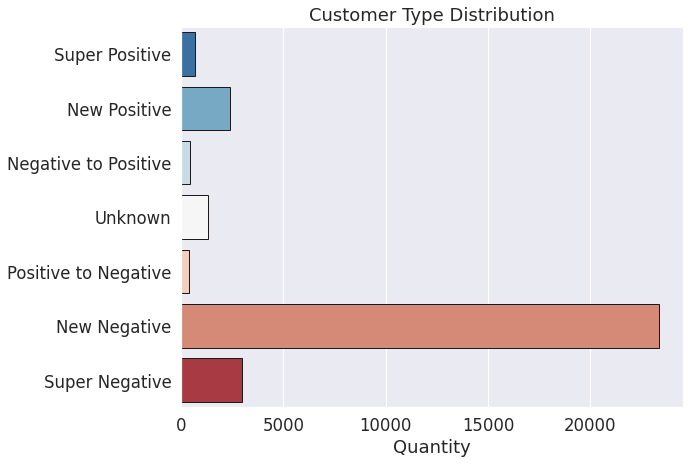

In [ ]:
# Comparison of the groups quantities
fig, ax = plt.subplots(figsize=(9,7))

order = ['Super Positive', 'New Positive', 'Negative to Positive', 'Unknown',
         'Positive to Negative', 'New Negative', 'Super Negative']

sns.set_context(rc = {'patch.linewidth': 0.1})
sns.countplot(y='group', data=Data, palette=sns.color_palette("RdBu_r", 7), order=order, linewidth=1, edgecolor='k')

plt.title('Customer Type Distribution')
plt.ylabel('')
plt.xlabel('Quantity')
plt.show()

Here, we can see the biggest category of the customers is the **New Negative group** followed by **Super Negatives** and **New Positives**.

Now we can explore other features whithin provided customer groups:

For example, let us see how the account balance varies within different groups:

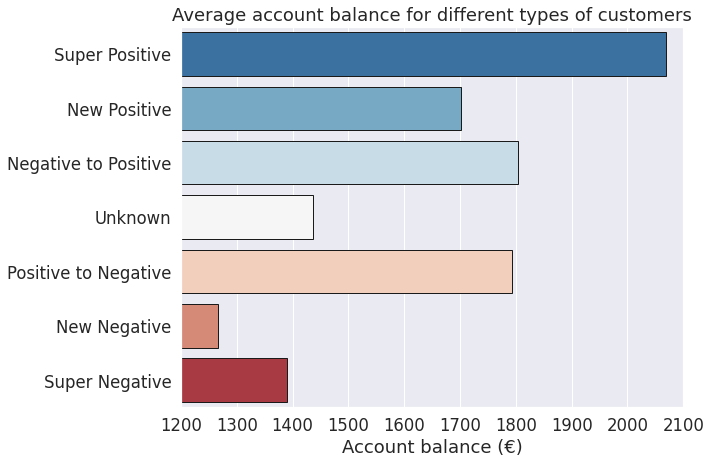

In [ ]:
# Variation of account balance in different groups
temp = Data.groupby('group', as_index=False)['accountBalance'].mean()
fig, ax = plt.subplots(figsize=(9,7))
sns.set_context(rc = {'patch.linewidth': 0.1})
sns.barplot(y='group', x='accountBalance', data=temp, palette=sns.color_palette("RdBu_r", 7), order=order, linewidth=1, edgecolor='k')

plt.title('Average account balance for different types of customers')
plt.ylabel('')
plt.xlabel('Account balance (€)')
plt.xlim(1200,2100)
plt.show()

OK, it can be seen the positive customers have a higher account balance than the negative clients.

Lets see what is their difference in age:

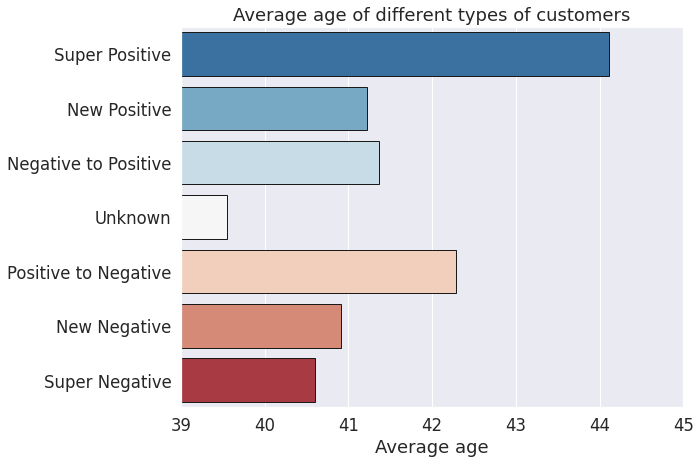

In [ ]:
# Age variation in different groups
temp = Data.groupby('group', as_index=False)['age'].mean()
fig, ax = plt.subplots(figsize=(9,7))
sns.set_context(rc = {'patch.linewidth': 0.1})
sns.barplot(y='group', x='age', data=temp, palette=sns.color_palette("RdBu_r", 7), order=order, linewidth=1, edgecolor='k')

plt.title('Average age of different types of customers')
plt.ylabel('')
plt.xlabel('Average age')
plt.xlim(39,45)
plt.show()

The diagram shows positive clients are in average older than the negative customers.

So, the combination of our insights from last two diagrams may lead to this conclusion that **our best customers are not so young and their account status is better than the others**.

### Discovering who are these lovely super positive customers:

I this step, we can focus on **Super Positive Customers** to see what are their characteristics and if required make a comparion with the other groups w.r.t. that feature:

As an example, we can check job distribution in Super Positive Customers and compare it with Super Negative group:

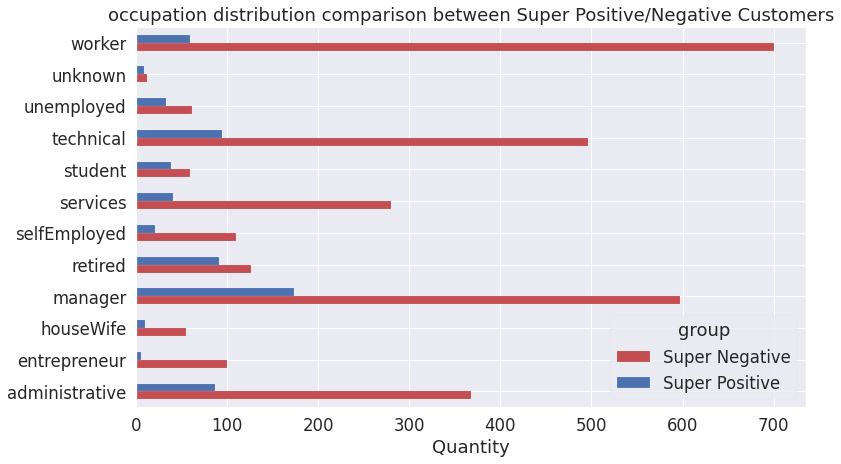

In [ ]:
# Comparion of two groups based on their job
temp = Data[(Data['group'] == 'Super Positive') | (Data['group'] == 'Super Negative')]
pd.crosstab(temp['job'],temp.group).plot(kind='barh', figsize=(12,7), color=['r', 'b'])
plt.title('occupation distribution comparison between Super Positive/Negative Customers')
plt.xlabel('Quantity')
plt.ylabel('');

Here we can see, the **<span style="color:green">'manager'</span>** is the top ranked occupation of **Super Positive Customers**, while  the **<span style="color:red">'worker'</span>** is the top ranked occupation of **Super Negative clients**.

We can also compare these two group based on the levels of education:

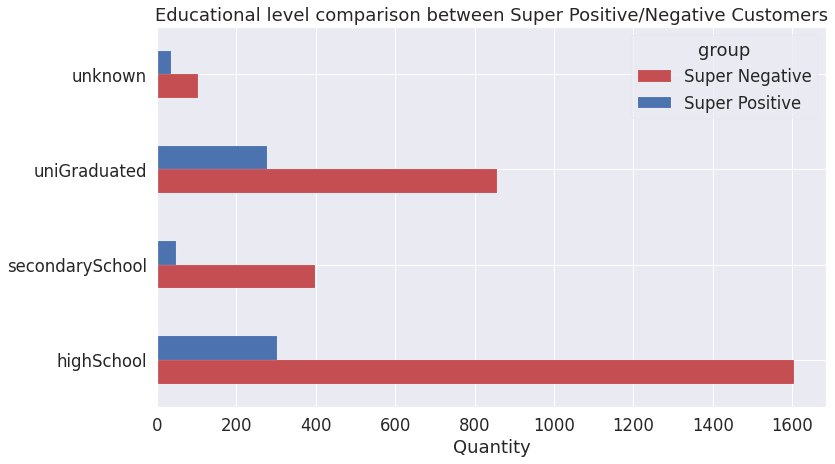

In [ ]:
# Comparion of two groups based on their educational level
# Comparion of two groups based on their job
temp = Data[(Data['group'] == 'Super Positive') | (Data['group'] == 'Super Negative')]
pd.crosstab(temp['education'],temp.group).plot(kind='barh', figsize=(12,7), color=['r', 'b'])
plt.title('Educational level comparison between Super Positive/Negative Customers')
plt.xlabel('Quantity')
plt.ylabel('');

In [ ]:
# Some textual information about educational levels in Super positive/negative customers
sumP = len(Data.loc[Data['group'] == 'Super Positive', :])
highSchoolP = len(Data.loc[(Data['group'] == 'Super Positive') & (Data['education'] == 'highSchool'), :])
sumN = len(Data.loc[Data['group'] == 'Super Negative', :])
highSchoolN = len(Data.loc[(Data['group'] == 'Super Negative') & (Data['education'] == 'highSchool'), :])

print('Percentage of Super positive customers with high school degree: {:.2f}%'.format(highSchoolP/(sumP)*100))
print('Percentage of Super Negative customers with high school degree: {:.2f}%\n'.format(highSchoolN/(sumN)*100))


uniP = len(Data.loc[(Data['group'] == 'Super Positive') & (Data['education'] == 'uniGraduated'), :])
uniN = len(Data.loc[(Data['group'] == 'Super Negative') & (Data['education'] == 'uniGraduated'), :])

print('Percentage of Super positive customers with a kind of university degree: {:.2f}%'.format(uniP/(sumP)*100))
print('Percentage of Super Negative customers with a kind of university degree: {:.2f}%'.format(uniN/(sumN)*100))

Percentage of Super positive customers with high school degree: 45.63%
Percentage of Super Negative customers with high school degree: 54.15%

Percentage of Super positive customers with a kind of university degree: 41.72%
Percentage of Super Negative customers with a kind of university degree: 28.91%


As it can be seen, while the majority (54.15 %) of **Super Negative clients** have the **high school** certificate, a higher number of **Super Positive Customers** have an academic certificate (41.72 % in Super Positive customers versus 28.91% in Super Negative clients).

In [ ]:
# Dropping the columns that we add to the data for visualization purposes.
# The information provided in these columns are extracted from the original columns so dropping them is not harmful
Data.drop(['dayNum'], axis = 1, inplace = True)
Data.drop(['group'], axis = 1, inplace = True)

### Data Preprocessing:

As one the objectives of the project is to define, train and evaluate some predictive models on the data and most of those models are just able to understand and work with *numerical values*, in this step we convert our categorical fields with '**object**' data type into most proper numerical values. In the following steps we'll perform such a conversion:

### Conversion of `target` feature into numerical representation of binary values {0,1}

Since we would like to plot the relationship between our target value and some other features, we need to convert target values into numerical representation of binary labels:

**target**:

no $\Longrightarrow$ 0

yes $\Longrightarrow$ 1

In [ ]:
target_conversion = {"target": {"no": 0, "yes": 1}}
Data.replace(target_conversion, inplace=True)

### one-hot-encoding of the field `month`:
---

A possible approach to convert the data type of the field `month` from categorial to numercal data type is to use **naive variable encoding** technique as follows:

**month**:

jan $\Longrightarrow$ 1

feb $\Longrightarrow$ 2

mar $\Longrightarrow$ 3

apr $\Longrightarrow$ 4

may $\Longrightarrow$ 5

jun $\Longrightarrow$ 6

jul $\Longrightarrow$ 7

aug $\Longrightarrow$ 8

sep $\Longrightarrow$ 9

oct $\Longrightarrow$ 10

nov $\Longrightarrow$ 11

dec $\Longrightarrow$ 12

But this may lead to misinterpretation of those values by machine learning models such that the model would think that for example the category of “apr” is greater than “jan” that obviously has no sense.

To prevent such a misinterpretation, we use **one hot encoding** to convert `month` values into numerical ones:

In [ ]:
### month one-hot Encoding ###

# Get one hot encoding of columns 'month'
month_one_hot = pd.get_dummies(Data.month)
# Drop column 'month' as it is now encoded
Data.drop('month',axis = 1, inplace=True)
# Join the encoded month fields
Data = Data.join(month_one_hot)

The same can be done with `job`, `maritalStatus` and `education` fields:

In [ ]:
###  one-hot encoding of the fields:
### 'job', 'maritalStatus', 'education', 'contactType' & 'lastCampaignResult'

# make a difference between 'job_unknown', 'education_unknown' and 'contactType_unknown'
Data.loc[Data['job'] == 'unknown', 'job'] = 'job_unknown'
Data.loc[Data['education'] == 'unknown', 'education'] = 'education_unknown'
Data.loc[Data['contactType'] == 'unknown', 'contactType'] = 'contactType_unknown'

# for more clarification of values in 'lastCampaignResult' field we change them as follows
Data.loc[Data['lastCampaignResult'] == 'unknown', 'lastCampaignResult'] = 'lastCampaignResult_unknown'
Data.loc[Data['lastCampaignResult'] == 'failure', 'lastCampaignResult'] = 'lastCampaignResult_failure'
Data.loc[Data['lastCampaignResult'] == 'other'  , 'lastCampaignResult'] = 'lastCampaignResult_other'
Data.loc[Data['lastCampaignResult'] == 'success', 'lastCampaignResult'] = 'lastCampaignResult_success'


columns = ['job', 'maritalStatus', 'education', 'contactType', 'lastCampaignResult']

for col in columns:
    # Get one hot encoding of the column
    col_one_hot = pd.get_dummies(Data[col])
    # Drop column as it is now encoded
    Data.drop(col,axis = 1, inplace=True)
    # Join the encoded Monat fields
    Data = Data.join(col_one_hot)

In [ ]:
# Variable Encoding of the fields 'gender', 'creditFailure', 'credit', 'house' as we did for 'target' before

Geschlecht_conversion = {"gender": {"female": 0, "male": 1}}
Data.replace(Geschlecht_conversion, inplace=True)

columns = ['creditFailure', 'credit', 'house']

for col in columns:
    conversion = {col: {"no": 0, "yes": 1}}
    Data.replace(conversion, inplace=True)

## Feature Selection and Feature Engineering:

This step often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn.

1. **Feature Selection**: is the process of choosing the most relevant features in the data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model to learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, the feature selection is the process of __subtracting__ less important features.


2. **Feature Engineering**: is defined as the process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping between these features and the target. This means taking transformations of variables, such as we did with the one-hot encoding categorical variables so they can be used in a model. Generally, one may think of the feature engineering as __adding__ additional features derived from the raw data.

### Feature Selection

`id` and `contactId` fields have unique or near unique values and as we know due to high variance of its values, such an information does not help any model to make a reliable prediction. So we can remove them from our training data.

In [ ]:
Data.drop(['id'], axis = 1, inplace = True)
Data.drop(['contactId'], axis = 1, inplace = True)

### Removing Multi-colinearities:

Correlated features in general don't improve models (although it depends on the specifics of the problem like the number of variables and the degree of correlation), but they affect specific models in different ways and to varying extents:

* For linear models (e.g., linear regression or logistic regression), multicolinearity can yield solutions that are wildly varying and possibly numerically unstable.

* Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interactions.

More generally, a simpler model is preferable, and, in some sense, a model with fewer features is simpler.

### Collineararity Ellimination

While variables in a dataset are usually correlated to a small degree, highly collinear variables can be redundant in the sense that we only need to retain one of the features to give our model the necessary information.

Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization. It can also help us to interpret the model because we only have to worry about less variables.

There are a number of methods for removing collinear features, such as using the [Variance Inflation Factor](http://www.statisticshowto.com/variance-inflation-factor/). We will use a simple metric, and remove features that have a correlation coefficient above a certain threshold (in our case 0.5) with each other (not with the target variable because we want variables that are highly correlated with the target variable)

The following function prints out all the collinear features based on a threshold we select for the correlation coefficients.

In [ ]:
def show_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        threshold: any features with correlations greater than this value are removed

    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # Dont want to remove correlations that are realted to the target variable
    x = x.drop(columns = ['target'])

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    return 0

In [ ]:
show_collinear_features(Data, 0.5);

uniGraduated | manager | 0.59
uniGraduated | highSchool | 0.66
lastCampaignResult_failure | daySinceLastCampaign | 0.7
lastCampaignResult_unknown | daySinceLastCampaign | 0.87
lastCampaignResult_unknown | numberOfContactsLastCampaign | 0.5
lastCampaignResult_unknown | lastCampaignResult_failure | 0.74


Based on what we see here, `uniGraduated` field has strong correlations with `manager` and `highSchool` features. That sounds reasonable because it is very likely that managers are high-educated (positive correlation) and customers who are high-educated can not be `highSchool` graduated (negative correlation).

So, we may remove `uniGraduated` feature, since it seems it duplicates the information that we have in other features.

In addition, `lastCampaignResult_unknown` feature is in a high correlation with three other features. So, we can remove it as well.

In [ ]:
Data.drop(['uniGraduated'], axis = 1, inplace = True)
Data.drop(['lastCampaignResult_unknown'], axis = 1, inplace = True)

### Correlation Discovery:

Now that our training data is ready for more numerical analysis, we can take a look at the **corrlation strength** between all the features and the target value:

In [ ]:
Data.corr()['target'][1:].sort_values(ascending=False)

duration                        0.39
lastCampaignResult_success      0.30
cellPhone                       0.14
mar                             0.13
oct                             0.13
sep                             0.12
daySinceLastCampaign            0.10
numberOfContactsLastCampaign    0.08
retired                         0.08
student                         0.07
dec                             0.07
single                          0.06
apr                             0.06
accountBalance                  0.06
feb                             0.04
manager                         0.04
lastCampaignResult_other        0.04
age                             0.03
landline                        0.01
unemployed                      0.01
lastCampaignResult_failure      0.01
divorced                        0.01
gender                          0.01
administrative                  0.01
education_unknown               0.01
job_unknown                     0.00
selfEmployed                   -0.01
t

It is more interesting to plot those values in a bar chart:

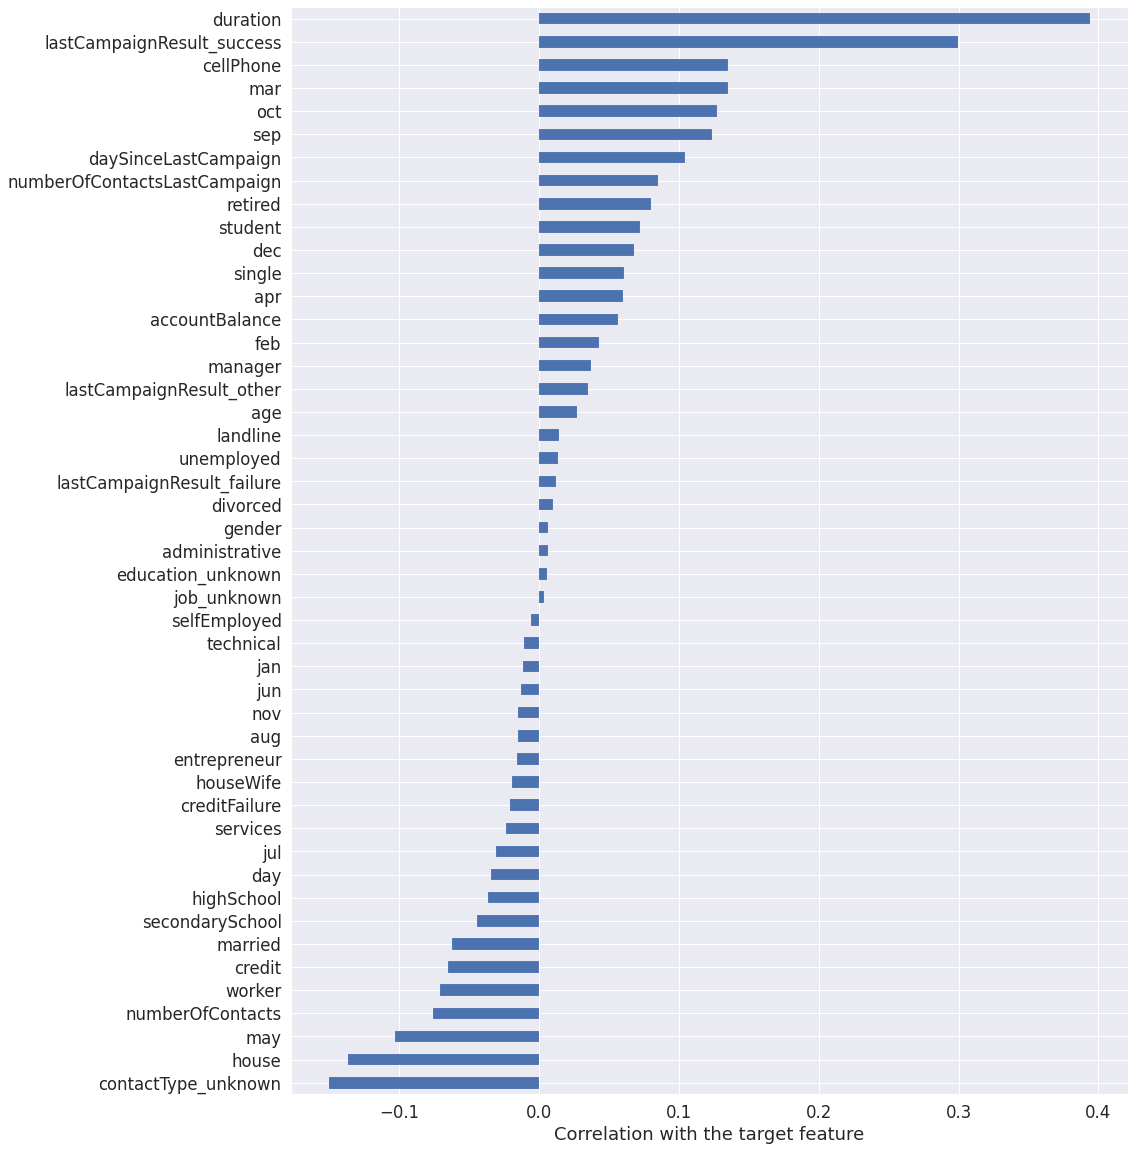

In [ ]:
fig = Data.corr()['target'][1:].sort_values(ascending=True).plot(kind='barh', figsize = (15,20))
fig.set(xlabel='Correlation with the target feature', ylabel='');

The following insights can be understood from our correlation bar chart:

1. The <span style="color:green">**call duration (duration)**</span> has a positive influence on response of the customer to the campaign. The longer we talk to the customer, the higher the possibility of his/her positive feedback to the campaign.

2. <span style="color:green">**lastCampaignResult_success**</span> has an strong correlation with the target. So, the likelihood of the campaign success is more for the customers who have <span style="color:green">**accepted the previous campaign**</span>, too (remeber those lovely super positive clients?).

3. Concering the correlation of the contact type, <span style="color:black">**cellPhone>landline>unknown**</span>. It's a good idea, to call the customers on their <span style="color:green">**cell phone**</span> rather than a <span style="color:red">**landline number**</span>. But remember, during the campaign, we contacted the vast majority of the customers through their cellphone. So, there is a bias on contact type of the customers and so, such a conclusion does not provide a real benefit.

4. Some months of the year such as <span style="color:green">**March, October** </span>and <span style="color:green">**September**</span> are the best time to call the customers. But again, we remember that those months are the time in which our contact numbers were low and possibly limited to our loyal customers, so the campaign success rate growed due to less number of contacts not the time of the year. But still, let's ask our employees to be more active during those months. :)

5. Since both the <span style="color:green">**daySinceLastCampaign & numberOfContactsLastCampaign**</span> have a positive correlations with the target, it's a good idea to call the customers whom we did not call for a while and were strongly involved in the last campaign.

6. It's beneficial to concentrate on <span style="color:green">**retired customers**</span> as well as customers who are <span style="color:green">**student**</span>.

7. For <span style="color:green">**single customers**</span> it's more likely to accept the campaign than the ones who are <span style="color:red">**married**</span> (being single has a positive correlation with the target, while being married has a negative correlation)

8. Customers with <span style="color:green">**higher account balance**</span> are easier to be convinced.

9. <span style="color:green">**Older**</span> customers may accept the campaign more than the <span style="color:red">**young**</span> ones.

10. There is not much difference between men and women. So, the customer <span style="color:blue">**gender**</span> is not the point and can be removed.

11. The call at the <span style="color:green">**begining of the month**</span> is more likely to be successful. Maybe at that time people have more money in their pocket and are more likely to buy our product.

12. Having <span style="color:red">**a negative credit history**</span> in the past has a negative influence on the target achievement.

13. <span style="color:red">**Calling**</span> the customer <span style="color:red">**several times**</span>, may have a bad influence on the customer's opinion about the campaign.

14. It is more likely to be successful when the customer does not <span style="color:red">**own a house**</span>.

15. Calling <span style="color:green">**managers**</span> directly is a better idea than calling their <span style="color:red">**employees**</span>.

Since both the positive and negative correlations indicate a relation between the associated feature and the target, we should consider the absolute value of correlations:

In [ ]:
 Data.corr()['target'][1:].abs().sort_values(ascending=False)

duration                       0.39
lastCampaignResult_success     0.30
contactType_unknown            0.15
house                          0.14
cellPhone                      0.14
mar                            0.13
oct                            0.13
sep                            0.12
daySinceLastCampaign           0.10
may                            0.10
numberOfContactsLastCampaign   0.08
retired                        0.08
numberOfContacts               0.08
student                        0.07
worker                         0.07
dec                            0.07
credit                         0.07
married                        0.06
single                         0.06
apr                            0.06
accountBalance                 0.06
secondarySchool                0.04
feb                            0.04
manager                        0.04
highSchool                     0.04
lastCampaignResult_other       0.04
day                            0.03
jul                         

Again we can take a look at the bar chart to see the importance order of the features:

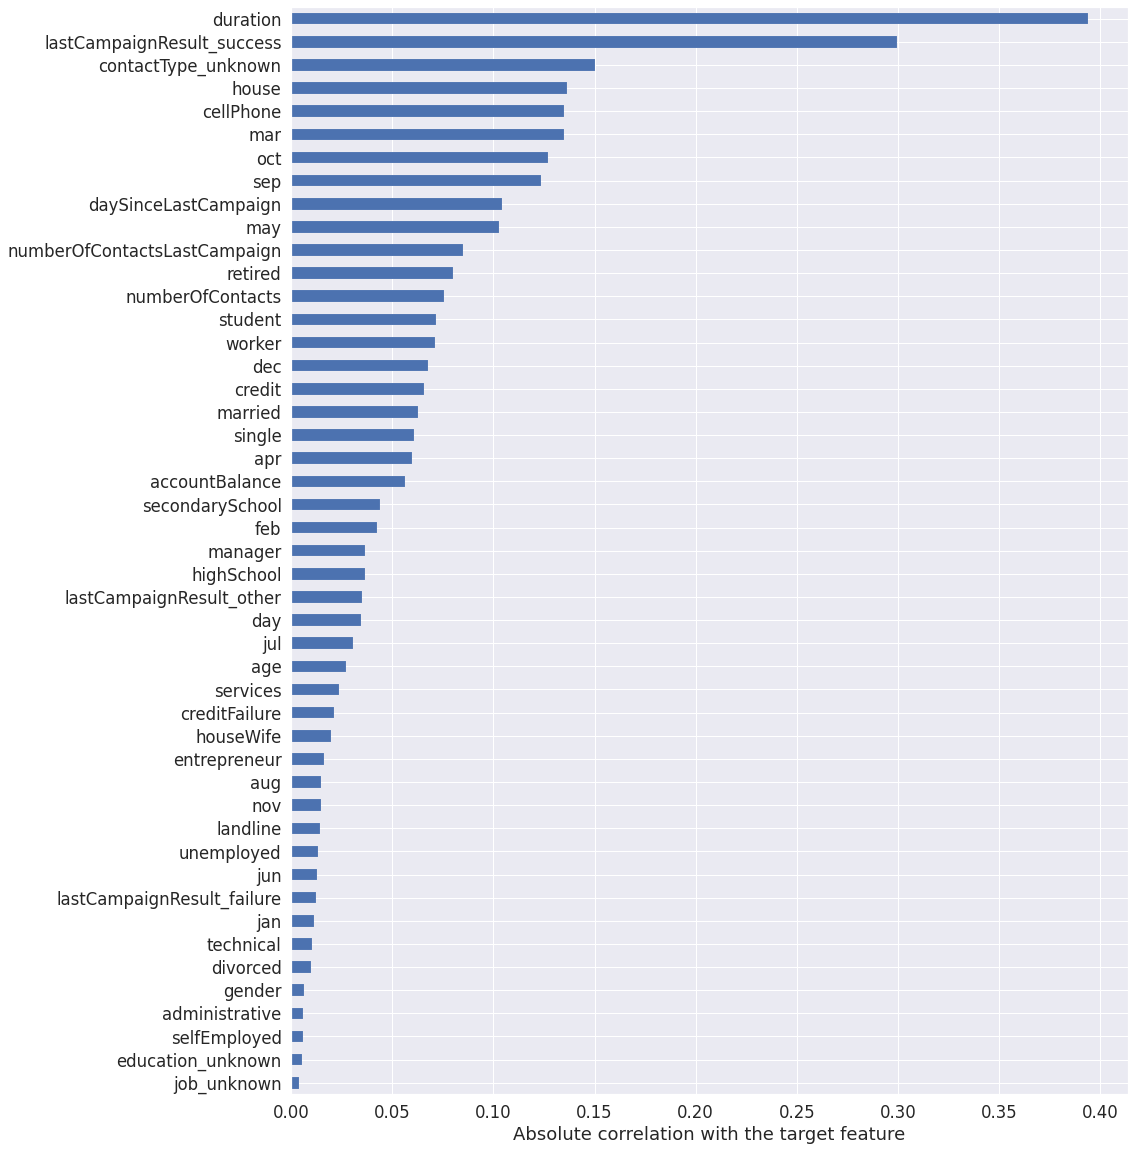

In [ ]:
fig = Data.corr()['target'][1:].abs().sort_values(ascending=True).plot(kind='barh', figsize = (15,20))
fig.set(xlabel='Absolute correlation with the target feature', ylabel='');

In order to select most important features, we use the following function to set a threshold (here 0.05) and choose all the features that their importance coefficients is above the threshold:

In [ ]:
def high_features(data, threshold):
    names = []
    for idx , val in ranking.iteritems():
        if val >= threshold:
            names.append(idx)
    return names

In [ ]:
ranking = Data.corr()['target'][1:].abs().sort_values(ascending=False)
myCols = high_features(ranking, 0.05)
myCols

['duration',
 'lastCampaignResult_success',
 'contactType_unknown',
 'house',
 'cellPhone',
 'mar',
 'oct',
 'sep',
 'daySinceLastCampaign',
 'may',
 'numberOfContactsLastCampaign',
 'retired',
 'numberOfContacts',
 'student',
 'worker',
 'dec',
 'credit',
 'married',
 'single',
 'apr',
 'accountBalance']

The above selection of the features is our selection based on **correlation coefficients** of the features with the target. We will refer to this set of features as <span style="color:red">**myCols**</span> in the following sections.

### Normalization

It is important to normalize our features so that they can have approximately same scale and be comparable. This also prevents high values dominate the low values so, the model can learn from all the features. Normalization specially helps the convergence of the optimization process within the models. This is also more important for some model such as SVM, neural network and KNN.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

X = Data.drop(columns='target')
y = pd.DataFrame(Data['target'])
dataCols = X.columns

scaler.fit(X)
X = scaler.transform(X)

Data = pd.DataFrame(X, columns=dataCols)
Data['target'] = y

In [ ]:
# decreasing binary features type accuracy for a more efficient memory usage
for col in Data.columns:
    if len(Data[col].unique()) == 2:
        Data[col]= Data[col].astype('uint8')

---

## Splitting the data Into Training and Test Sets

In machine learning, we always need to separate our features into two sets:

1. __Training set__ which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.
2. __Test (validation) set__ which we use to evaluate the mapping learned by the model. The model has never seen the answers on the test set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world.

In [ ]:
# Separate out the features and targets
# on the original data
def orgData(Data):
    X = Data.drop(columns='target')
    y = pd.DataFrame(Data['target'])
    dataCols = X.columns

    X_values = X.values
    y_values = np.array(y).reshape((-1,))

    X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size = 0.2, random_state = 0)
    return [dataCols, X_train, X_test, y_train, y_test]

In [ ]:
# Separate out the features and targets
# on the data that includes only 'myCols' features
def myData(Data):
    X = pd.DataFrame(Data[myCols])
    y = pd.DataFrame(Data['target'])
    dataCols = X.columns

    X_values = X.values
    y_values = np.array(y).reshape((-1,))

    X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size = 0.2, random_state = 0)
    return [X_train, X_test, y_train, y_test]

### Using Synthetic Minority Over-sampling Technique (SMOTE) to overcome the imbalanced label problem

To overcome the previously discovered label imbalance problem in the training data, we can use the **Synthetic Minority Over-sampling Technique (SMOTE)** algorithm to create synthetic samples from the minor class.

In [ ]:
from imblearn.over_sampling import SMOTE

def smoteData(Data):
    [dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

    smote = SMOTE(random_state=0)

    smote_data_X,smote_data_y = smote.fit_resample(X_train, y_train)

    smote_data_X = pd.DataFrame(data=smote_data_X,columns=dataCols)
    smote_data_y = pd.DataFrame(data=smote_data_y,columns=['target'])

    X_train_smote = smote_data_X.values
    y_train_smote = smote_data_y.values
    y_train_smote = y_train_smote.reshape((-1,))

    return [X_train_smote, X_test, y_train_smote, y_test]

**Note:** In this function, oversampling is performed while the test data is excluded, So, no test data information is exploited for model training.

So we have three functions that can be used to split different kinds of the data into training and test sets:

1. **orgData** that splits the original version of the data into training and test samples.

2. **myData** that splits a version of the data into training and test samples that includes only **myCols** features (features that are chosen based oh their correlations with the target).

3. **smoteData** that splits a version of the data into training and test samples that includes over-sampled minority class and is balanced w.r.t. our binary labels.

At the beginning of each training process, one of these functions will be used to prepare the data.

## Training some models (binary classifiers) on the data:

In this part, we train some models such as logistic regression and Random Forest to see how much better do they perform than our baseline random guess:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, make_scorer
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

### Baseline establishment:

It's important to establish a naive baseline before we training machine learning models. If the models we build cannot outperform a naive guess then we might have to admit that machine learning is not suited for this problem. Possible reasons for such a situation would be not using the right models, need for more data, existence of a simpler solution that does not require machine learning.

For a binary classification task, a good naive baseline is to select one of two possible labels with the probability of 50%. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the medin value, then we will need to rethink our approach.

To be sure that our data is splitted correctly, we may check if two sets of training and test data have an equal proportion of positive samples:

In [ ]:
[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

print('percentage of positive labels in training data: {:.2f}%' . format(sum(y_train)/len(y_train)*100))
print('percentage of positive labels in test data: {:.2f}%' . format(sum(y_test)/len(y_test)*100))

percentage of positive labels in training data: 11.76%
percentage of positive labels in test data: 11.72%


In [ ]:
y_baseline = np.random.randint(2, size=len(y_test))

Before going further we have to think about the meaning and the importance of two concepts in our problem:

1. **False Positive predictions (Type I error)**: means we wrongly classified negative customers (who will reject the campaign) as positive customers (who will accept the campaign). The consequence of such a wrong prediction, is to waste our time to contact those customers and get a rejection. Not so bad.


2. **False Negative predictions (Type II error)**: means we wrongly classified positive customers (who will accept the campaign) as negative customers (who will reject the campaign). The consequence of such a wrong prediction, is to not contact good customers and lose an excellent sale opportunity. That is not the situation that your manager wants to deal with. Too dangerous!

So, we should take a measure that is cautious about the **False Negative** rate which is **recall**.

Now, we can evaluate the baseline guess recall score on the test set:

In [ ]:
recall = recall_score(y_test, y_baseline)
print("Baseline Performance on the test set: %.2f%%" % (recall * 100.0))

Baseline Performance on the test set: 50.27%


Here we introduce some extra fuctions that are reponsible for the rest of the process:

In [ ]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm[[0, 1]] = cm[[1, 0]] # swapping rows
    cm[:,[1,0]] = cm[:,[0,1]] # swapping cols
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    """
    This function trains the input model on the data, evaluates the model performance on the test set,
    plots the confusion matrix of the model and finally reports the model recall score on the test data
    """
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, classes=np.array(['yes', 'no']), normalize=True)
    plt.grid(None)
    print('\n', classification_report(y_test, y_pred, target_names=np.array(['yes', 'no']), labels = [1, 0]))

    print("Dimensions of training data: {}" .format(X_train.shape))

    recall = recall_score(y_test, y_pred)
    print("Recall: %.2f%%" % (recall * 100.0))

    return model, (recall * 100.0)

In [ ]:
def grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, refit_score):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)


    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    return grid_search

In [ ]:
def plotROC(model, X_train, y_Train, X_test, y_Test, typ=1):
    """
    this function plots the ROC curve of a trained model on the test data
    and reports the Area Under Curve (AUC) for it.
    """
    if typ == 1:
        y_pred = model.predict_proba(X_test)
        # keep probabilities for the positive outcome only
        y_pred = y_pred[:, 1]
    else:
        y_pred = model.decision_function(X_test)



    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    fig, ax = plt.subplots(figsize=(9,6))
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.plot([0, 0], [0, 1], 'k-') # right
    ax.plot([1, 0], [0, 0], 'k-') # down
    ax.plot([1, 1], [0, 1], 'k-') # left
    ax.plot([1, 0], [1, 1], 'k-') # up
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve of the current classifier')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

def checkThresh(clf, X_test, y_test, typ = 1, prt=0):

    """
    this function plots the ROC curve of a trained model on the test data
    against nine different thresholds {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9} for classification probability thresholding
    """

    TSs = []
    TPs = []
    FPs = []
    for threshold in np.arange(0.1, 1, 0.1):
        TSs.append(round(threshold,2))

        if typ == 1:
            predicted_proba = clf.predict_proba(X_test)
            y_pred = (predicted_proba [:,1] >= threshold).astype('int')
        else:
            predicted_proba = clf.decision_function(X_test)
            y_pred = (predicted_proba >= threshold).astype('int')


        cm = confusion_matrix(y_test, y_pred)

        FN = cm[0][0] / (cm[0][0] + cm[0][1])
        FP = cm[0][1] / (cm[0][0] + cm[0][1])
        FPs.append(FP)
        TN = cm[1][0] / (cm[1][0] + cm[1][1])
        TP = cm[1][1] / (cm[1][0] + cm[1][1])
        TPs.append(TP)

        if prt:
            print('Threshold: {:.1f}, TP: {:.2f}, TN: {:.2f} , FP: {:.2f}, FN: {:.2f} %'
              .format(threshold, TP, FN, FP, TN))

    fig, ax = plt.subplots(figsize=(9,6))
    ax.scatter( x=FPs, y=TPs , label='ROC Convex Hall')
    ax.plot([0, 1], [0, 1], 'k--') # diag
    ax.plot([0, 0], [0, 1], 'k-') # right
    ax.plot([1, 0], [0, 0], 'k-') # down
    ax.plot([1, 1], [0, 1], 'k-') # left
    ax.plot([1, 0], [1, 1], 'k-') # up
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC convex hull for different thresholds on the current classifier')

    for i, label in enumerate(TSs):
        ax.annotate(label, (FPs[i]+0.01, TPs[i]+ 0.005), fontsize=14)

    plt.show()

In [ ]:
# A Dataframe to hold the results
results = pd.DataFrame({'model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Extra Trees',
                                           'Gradient Boosting', 'Xgboost'] })
results['orgDataDefault'] = ''
results['myColsDefault'] = ''
results['orgDataOptimal'] = ''
results['myColsOptimal'] = ''
results['orgDataOptimalRFE'] = ''
results['smoteDataDefault'] = ''
results['smoteDataOptimal'] = ''
results['smoteDataOptimalRFE'] = ''

### Training steps for each model:

In the following section, I train several machine learning models including:

1. Logistic Regression (LR) *
2. Random Forest Classifier (RFC) *
3. Support Vector Classifier (SVC) *
4. Extra Trees Classifier (ETC) *
5. Gradient Boosting Classifier (GBC) +
6. eXtreme Gradient Boosting (XGBoost) +

(*): models that have an explicit parameter to handle imbalanced label problem (class_weight='balanced')

(+): models that don't have an explicit parameter to handle imbalanced label problem

Processing steps on (*) models:

1. Training the model with the default hyper parameters on the original Data (orgData) and plotting the results.
2. Training the model with the default hyper parameters on previously selected features (myData) and plotting the results.
3. Execution of the Grid Search Cross Validation technique for tuning model hyper parameters (finding optimal hyper parameters).
4. Training the model with the optimal hyper parameters on the original Data (orgData) and plotting the results.
5. Training the model with the optimal hyper parameters on previously selected features (myData) and plotting the results.
6. Runnig the Recursive Feature Elimination (RFE) method with cross-validation as the second feature selection approach.
7. Training the model with the optimal hyper parameters on the resulting features of the RFE process on orgData and plotting the results.



Processing steps on (+) models:

1. Training the model with the default hyper parameters on the balanced Data (smoteData) and plotting the results.
2. Execution of the Grid Search Cross Validation technique for tuning model hyper parameters (finding optimal hyper parameters).
3. Training the model with the optimal hyper parameters on the balanced Data (smoteData) and plotting the results.
4. Running the Recursive Feature Elimination (RFE) method with cross-validation as the second feature selection approach.
5. Training the model with the optimal hyper parameters on the resulting features of the RFE process on the balanced Data (smoteData) and plotting the results.

### Model # 1: Logistic Regression


               precision    recall  f1-score   support

         yes       0.42      0.81      0.55       738
          no       0.97      0.85      0.91      5558

    accuracy                           0.85      6296
   macro avg       0.70      0.83      0.73      6296
weighted avg       0.91      0.85      0.87      6296

Dimensions of training data: (25184, 47)
Recall: 81.03%


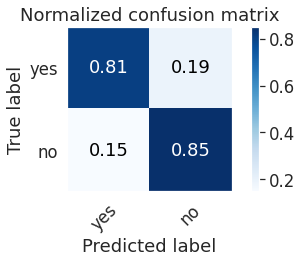

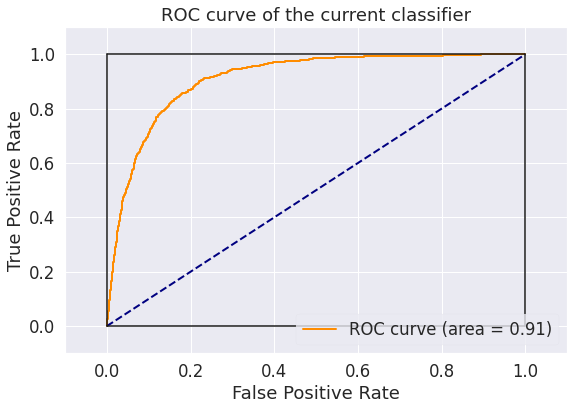

In [ ]:
# First model (Logistic Regression) definition, training and evaluation
# on the original data (orgData)
# with default hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced')

logreg, results.at[0, 'orgDataDefault']  = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

         yes       0.42      0.81      0.55       738
          no       0.97      0.85      0.91      5558

    accuracy                           0.85      6296
   macro avg       0.70      0.83      0.73      6296
weighted avg       0.91      0.85      0.87      6296

Dimensions of training data: (25184, 21)
Recall: 80.76%


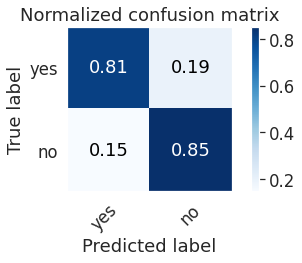

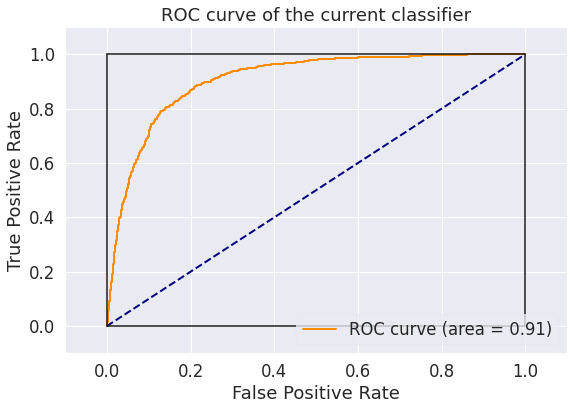

In [ ]:
# First model (Logistic Regression) definition, training and evaluation
# on previously selected features (myData)
# with default hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced')

logreg, results.at[0, 'myColsDefault'] = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)

In [ ]:
# GridSearchCV for tuning hyper parameters of the first model (Logistic Regression)

[X_train, X_test, y_train, y_test] = myData(Data)

clf = LogisticRegression(class_weight= 'balanced', verbose=0, max_iter=1000)

param_grid = {
    'solver': ['lbfgs', 'newton-cg'],
    'C' : [0.5, 1, 2, 10, 100, 1000, 10000],
    'tol' : [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

Best params for recall_score
{'C': 100, 'solver': 'lbfgs', 'tol': 1e-06}


In [ ]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_C',
         'param_tol', 'param_solver']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_C,param_tol,param_solver
42,0.41,0.80,0.84,100,0.00,lbfgs
43,0.41,0.80,0.84,100,0.00,lbfgs
40,0.41,0.80,0.84,100,0.00,lbfgs
49,0.41,0.80,0.84,100,0.01,newton-cg
48,0.41,0.80,0.84,100,0.00,newton-cg



               precision    recall  f1-score   support

         yes       0.42      0.82      0.56       738
          no       0.97      0.85      0.91      5558

    accuracy                           0.85      6296
   macro avg       0.70      0.84      0.73      6296
weighted avg       0.91      0.85      0.87      6296

Dimensions of training data: (25184, 47)
Recall: 82.38%


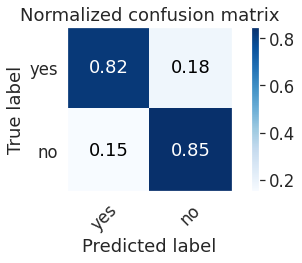

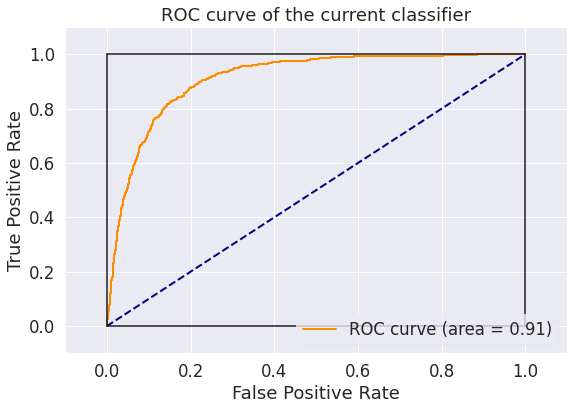

In [ ]:
# First model (Logistic Regression) definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100, solver='lbfgs', tol=1e-06, max_iter=1000)

logreg, results.at[0, 'orgDataOptimal']  = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

         yes       0.42      0.81      0.55       738
          no       0.97      0.85      0.91      5558

    accuracy                           0.84      6296
   macro avg       0.69      0.83      0.73      6296
weighted avg       0.91      0.84      0.86      6296

Dimensions of training data: (25184, 21)
Recall: 81.44%


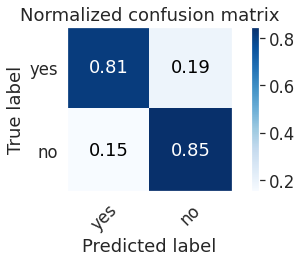

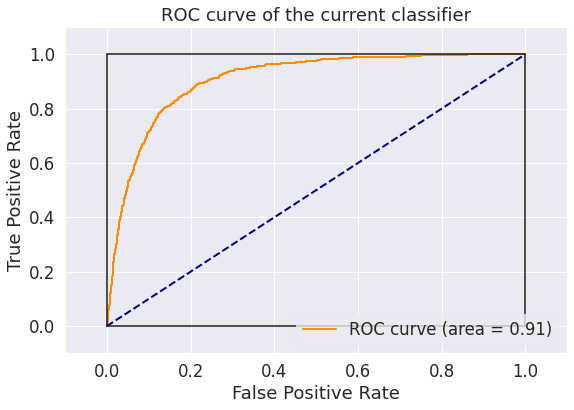

In [ ]:
# First model (Logistic Regression) definition, training and evaluation
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100, solver='lbfgs', tol=1e-06, max_iter=1000)

logreg, results.at[0, 'myColsOptimal'] = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)

Optimal number of features : 27

Feature Ranking:

Variable: duration             Importance: 1
Variable: accountBalance       Importance: 1
Variable: house                Importance: 1
Variable: credit               Importance: 1
Variable: numberOfContacts     Importance: 1
Variable: daySinceLastCampaign Importance: 1
Variable: numberOfContactsLastCampaign Importance: 1
Variable: aug                  Importance: 1
Variable: dec                  Importance: 1
Variable: jan                  Importance: 1
Variable: jul                  Importance: 1
Variable: jun                  Importance: 1
Variable: mar                  Importance: 1
Variable: may                  Importance: 1
Variable: nov                  Importance: 1
Variable: oct                  Importance: 1
Variable: sep                  Importance: 1
Variable: houseWife            Importance: 1
Variable: retired              Importance: 1
Variable: selfEmployed         Importance: 1
Variable: student              Importance

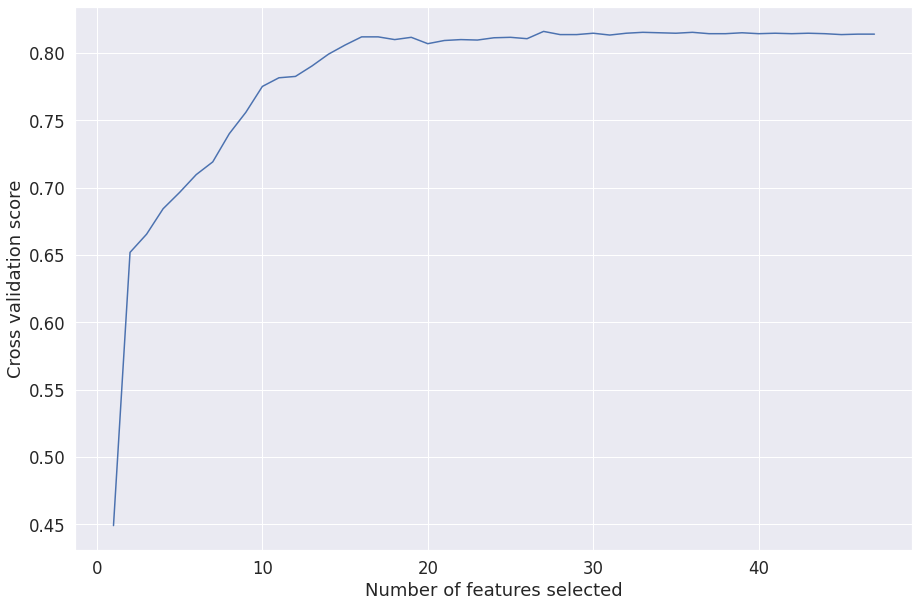

In [ ]:
### Recursive feature elimination with cross-validation for the first model (Logistic regression)

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(3), scoring='recall')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
Qty = rfecv.n_features_

# Get numerical feature importances
importances = list(rfecv.ranking_)
# Saving feature names for later use
feature_list = list(dataCols)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances
print('\nFeature Ranking:\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Here, the trend of scores becomes relatively flat from about 27 features. So, we can try with 27 features with highest ranking.

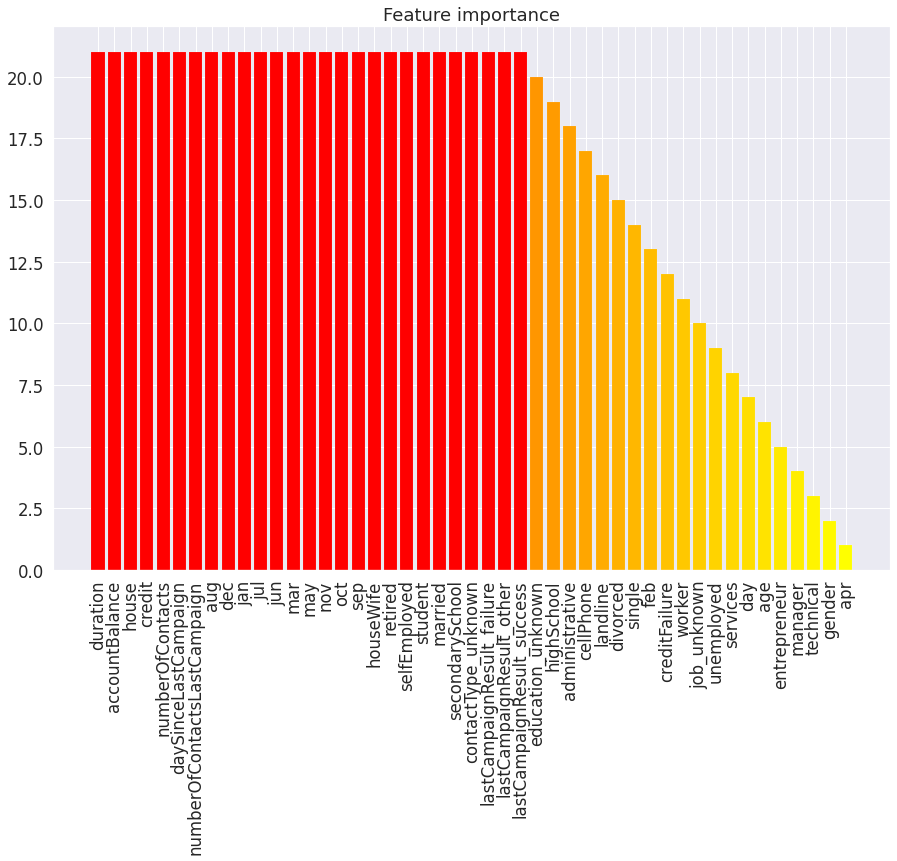

In [ ]:
# Plotting feature importances based on RFE selection approach
MAX_score = feature_importances[-1:][0][1] + 1

import importlib

plot_data = {}

for i in feature_importances:
    plot_data[i[0]] = MAX_score - i[1]
colors = ['red'] * (Qty)
cmap = get_cmap(len(plot_data), name = 'autumn')
for i in range(Qty, len(plot_data)+1):
    colors.append(cmap(i))
plt.figure(figsize=(15,10))
plt.bar(plot_data.keys(), plot_data.values(), color = colors)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

In [ ]:
# Determining indices of the features that should be dropped
removing_idx = []

idx = 0
for feature in feature_importances:
    if feature[1] > 1:
        removing_idx.append(idx)
    idx += 1


               precision    recall  f1-score   support

         yes       0.38      0.80      0.52       738
          no       0.97      0.83      0.89      5558

    accuracy                           0.83      6296
   macro avg       0.68      0.82      0.71      6296
weighted avg       0.90      0.83      0.85      6296

Dimensions of training data: (25184, 27)
Recall: 80.35%


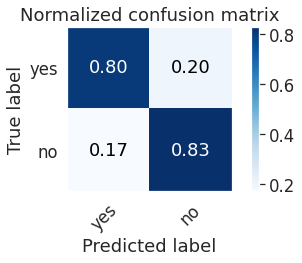

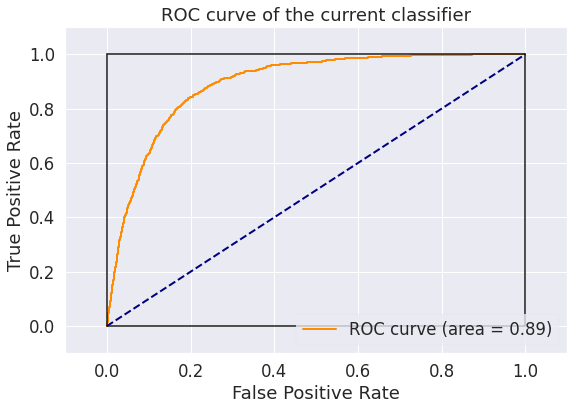

In [ ]:
# First model (Logistic Regression) definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters
# using RFE feature selection

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)


logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100, solver='lbfgs', tol=1e-06, max_iter=1000)

logreg, results.at[0, 'orgDataOptimalRFE'] = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)

In [ ]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.03,80.76,82.38,81.44,80.35,,,
1,Random Forest,,,,,,,,
2,Support Vector Machine,,,,,,,,
3,Extra Trees,,,,,,,,
4,Gradient Boosting,,,,,,,,
5,Xgboost,,,,,,,,


### Model # 2: Random Forest


               precision    recall  f1-score   support

         yes       0.71      0.31      0.43       738
          no       0.91      0.98      0.95      5558

    accuracy                           0.90      6296
   macro avg       0.81      0.65      0.69      6296
weighted avg       0.89      0.90      0.89      6296

Dimensions of training data: (25184, 47)
Recall: 31.17%


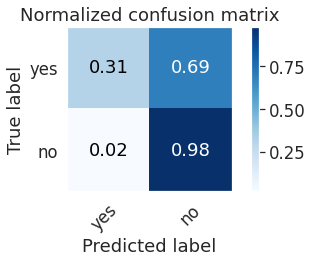

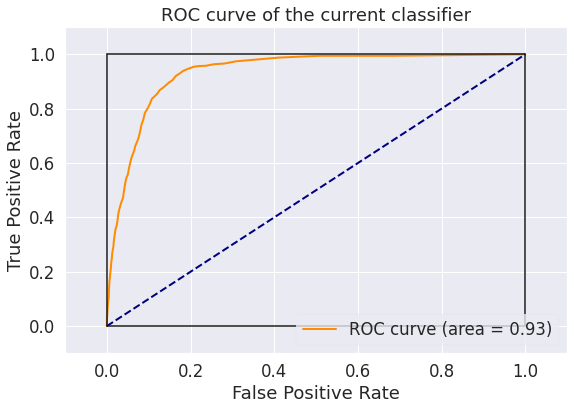

In [ ]:
# Second model (Random Forest) definition, train and evaluation:
# on the original data (orgData)
# with default hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

forest = RandomForestClassifier(random_state=0, class_weight='balanced')

forest, results.at[1, 'orgDataDefault'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

         yes       0.64      0.41      0.50       738
          no       0.93      0.97      0.95      5558

    accuracy                           0.90      6296
   macro avg       0.78      0.69      0.72      6296
weighted avg       0.89      0.90      0.89      6296

Dimensions of training data: (25184, 21)
Recall: 41.19%


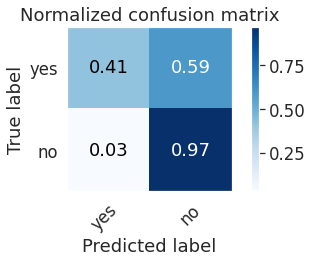

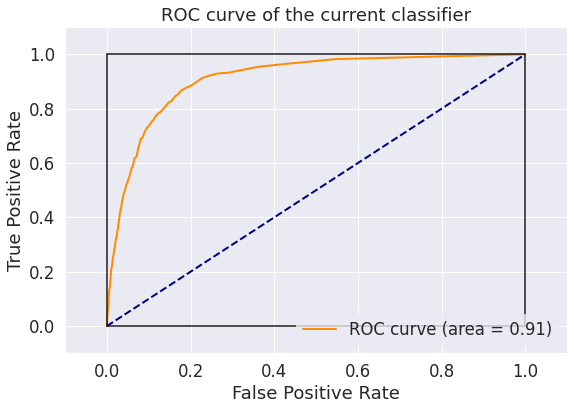

In [ ]:
# Second model (Random Forest) definition, train and evaluation:
# on previously selected features (myData)
# with default hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

forest = RandomForestClassifier(random_state=0, class_weight='balanced')

forest, results.at[1, 'myColsDefault'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)

In [ ]:
# GridSearchCV for tuning hyper parameters of the second model (Random Forest)

[X_train, X_test, y_train, y_test] = myData(Data)


stage = 5

if stage == 1:
    # In order to decide on boosting parameters, we need to set some 'initial values' of other parameters.
    # all of these values are just initial estimates and will be tuned later.

    # Here, we try to choose some initial values for parameters that do not decrease the recall score that we had
    # with the default values of the parameters
    clf = RandomForestClassifier(max_depth=10,random_state=0, class_weight='balanced')

    # Now, we check the optimum number of trees.
    # For this purpose, we can do a grid search and test out values from 20 to 100 in steps of 20.
    param_grid = {
        'n_estimators' : range(60, 150, 20) # 80
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 2:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = RandomForestClassifier(n_estimators=80, random_state=0, class_weight='balanced')

    param_grid = {
        'max_depth' : range(2,15,2) # 6
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 3:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = RandomForestClassifier(n_estimators=80, max_depth=6, random_state=0, class_weight='balanced')

    param_grid = {
        'min_samples_split' : range(2,15,2) # 4
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 4:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = RandomForestClassifier(n_estimators=80, max_depth=6,
                               random_state=0, class_weight='balanced', min_samples_split=4)

    param_grid = {
        'min_samples_leaf' : range(2,15,2) # 12
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 5:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0,
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

    param_grid = {
        'max_features' : [3, 4, 5, 6, 7, 8] # 5 , here dafault value (sqrt) works well, no need to add the parameter explicitly
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

Best params for recall_score
{'max_features': 5}



               precision    recall  f1-score   support

         yes       0.38      0.86      0.53       738
          no       0.98      0.82      0.89      5558

    accuracy                           0.82      6296
   macro avg       0.68      0.84      0.71      6296
weighted avg       0.91      0.82      0.85      6296

Dimensions of training data: (25184, 47)
Recall: 85.64%


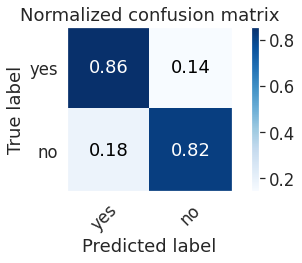

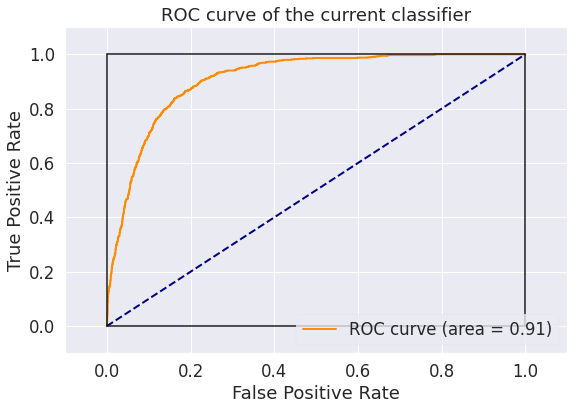

In [ ]:
# Second model (Random Forest) definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

forest = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0,
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

forest, results.at[1, 'orgDataOptimal'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

         yes       0.38      0.87      0.53       738
          no       0.98      0.81      0.89      5558

    accuracy                           0.82      6296
   macro avg       0.68      0.84      0.71      6296
weighted avg       0.91      0.82      0.85      6296

Dimensions of training data: (25184, 21)
Recall: 87.26%


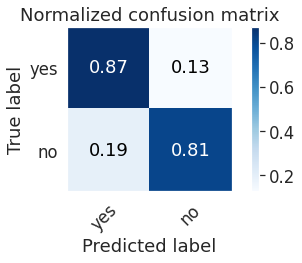

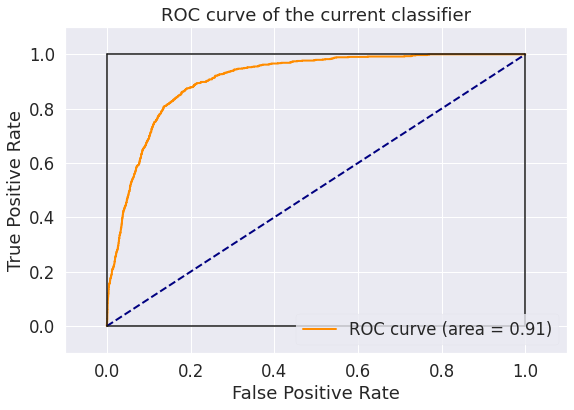

In [ ]:
# Second model (Random Forest) definition, train and evaluation:
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

forest = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0,
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

forest, results.at[1, 'myColsOptimal'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)

Optimal number of features : 28

Feature Ranking:

Variable: day                  Importance: 1
Variable: duration             Importance: 1
Variable: age                  Importance: 1
Variable: accountBalance       Importance: 1
Variable: house                Importance: 1
Variable: credit               Importance: 1
Variable: numberOfContacts     Importance: 1
Variable: daySinceLastCampaign Importance: 1
Variable: numberOfContactsLastCampaign Importance: 1
Variable: apr                  Importance: 1
Variable: aug                  Importance: 1
Variable: jul                  Importance: 1
Variable: jun                  Importance: 1
Variable: mar                  Importance: 1
Variable: may                  Importance: 1
Variable: nov                  Importance: 1
Variable: oct                  Importance: 1
Variable: sep                  Importance: 1
Variable: retired              Importance: 1
Variable: student              Importance: 1
Variable: worker               Importance

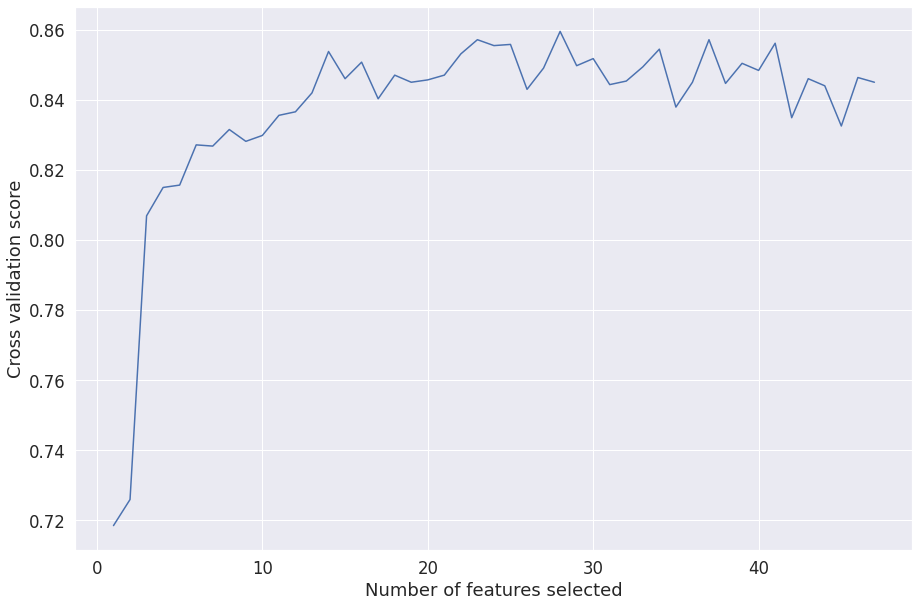

In [ ]:
### Recursive feature elimination with cross-validation for the second model (Random Forest)

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

forest = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0,
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

rfecv = RFECV(estimator=forest, step=1, cv=StratifiedKFold(3), scoring='recall')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
Qty = rfecv.n_features_

# Get numerical feature importances
importances = list(rfecv.ranking_)
# Saving feature names for later use
feature_list = list(dataCols)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances
print('\nFeature Ranking:\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

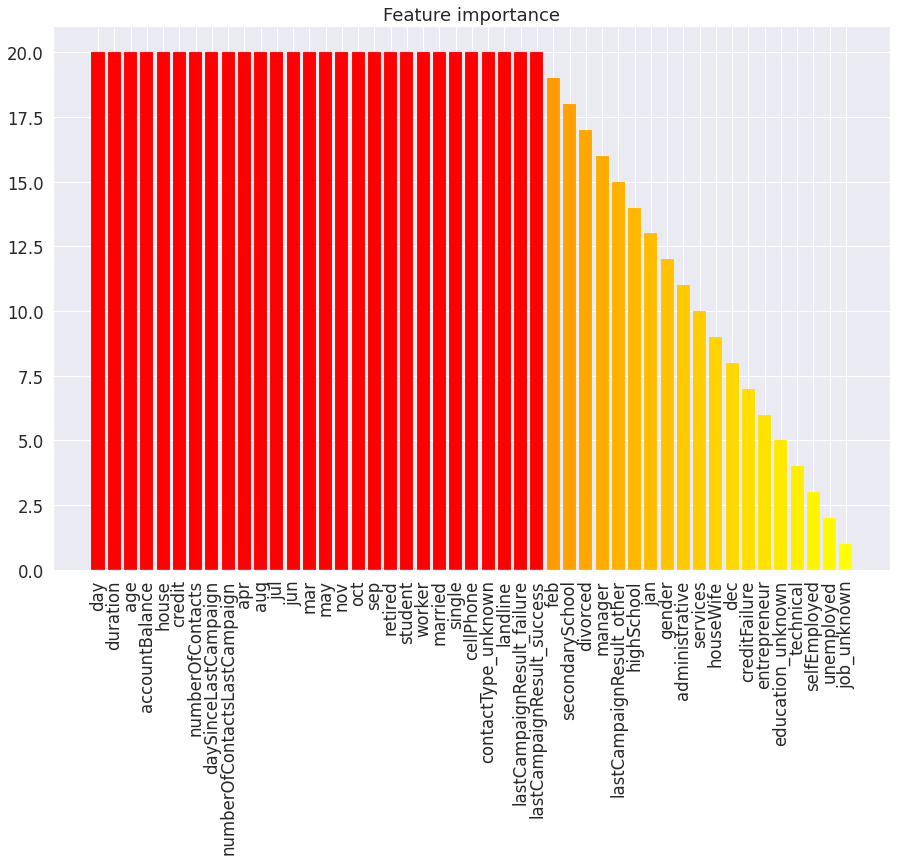

In [ ]:
# Plotting feature importances based on RFE selection approach

MAX_score = feature_importances[-1:][0][1] + 1

import importlib

plot_data = {}

for i in feature_importances:
    plot_data[i[0]] = MAX_score - i[1]
colors = ['red'] * (Qty)
cmap = get_cmap(len(plot_data), name = 'autumn')
for i in range(Qty, len(plot_data)+1):
    colors.append(cmap(i))
plt.figure(figsize=(15,10))
plt.bar(plot_data.keys(), plot_data.values(), color = colors)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

In [ ]:
# Determining indices of the features that should be dropped

removing_idx = []

idx = 0
for feature in feature_importances:
    if feature[1] > 1:
        removing_idx.append(idx)
    idx += 1


               precision    recall  f1-score   support

         yes       0.38      0.84      0.52       738
          no       0.97      0.82      0.89      5558

    accuracy                           0.82      6296
   macro avg       0.68      0.83      0.71      6296
weighted avg       0.91      0.82      0.85      6296

Dimensions of training data: (25184, 28)
Recall: 84.15%


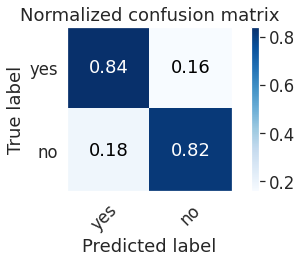

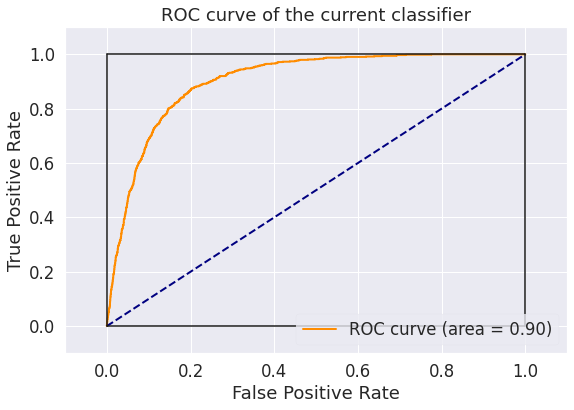

In [ ]:
# Second model (Random Forest) definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters
# using RFE feature selection

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)

forest = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0,
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

forest, results.at[1, 'orgDataOptimalRFE'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)

In [ ]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.03,80.76,82.38,81.44,80.35,,,
1,Random Forest,31.17,41.19,85.64,87.26,84.15,,,
2,Support Vector Machine,,,,,,,,
3,Extra Trees,,,,,,,,
4,Gradient Boosting,,,,,,,,
5,Xgboost,,,,,,,,


### Model # 3: SVM


               precision    recall  f1-score   support

         yes       0.44      0.83      0.58       738
          no       0.97      0.86      0.91      5558

    accuracy                           0.86      6296
   macro avg       0.71      0.84      0.75      6296
weighted avg       0.91      0.86      0.88      6296

Dimensions of training data: (25184, 47)
Recall: 82.79%


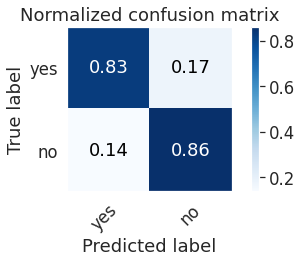

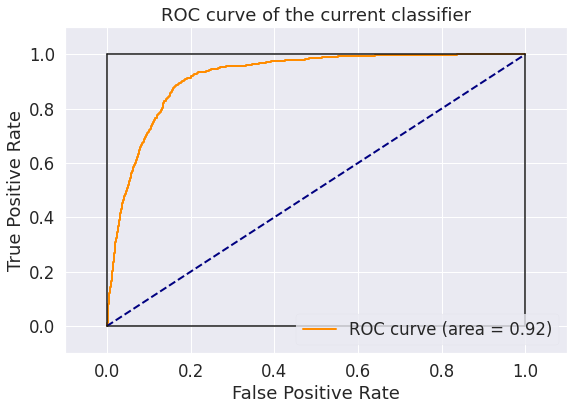

In [ ]:
# Third model (SVM) definition, definition, training and evaluation
# on the original data (orgData)
# with default hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

from sklearn.svm import SVC

svc = SVC(random_state=0, class_weight='balanced')

svc, results.at[2, 'orgDataDefault'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)


               precision    recall  f1-score   support

         yes       0.43      0.83      0.56       738
          no       0.97      0.85      0.91      5558

    accuracy                           0.85      6296
   macro avg       0.70      0.84      0.73      6296
weighted avg       0.91      0.85      0.87      6296

Dimensions of training data: (25184, 21)
Recall: 82.52%


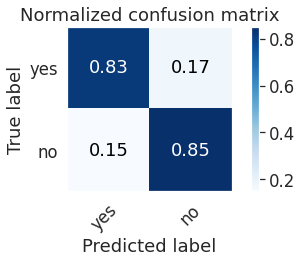

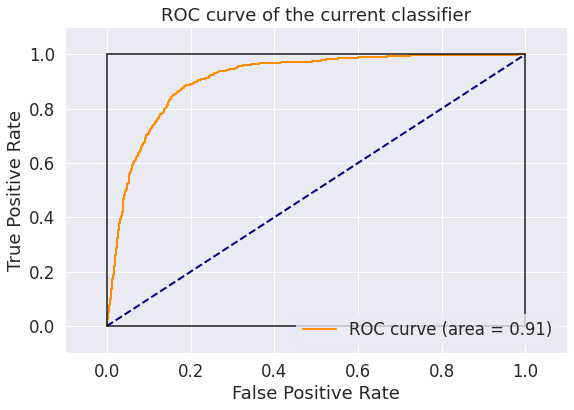

In [ ]:
# Third model (SVM) definition, training and evaluation
# on previously selected features (myData)
# with default hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

from sklearn.svm import SVC

svc = SVC(random_state=0, class_weight='balanced')

svc, results.at[2, 'myColsDefault'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)

In [ ]:
# GridSearchCV for tuning the parameters of the third model (SVC)
# on myCols

[X_train, X_test, y_train, y_test] = myData(Data)

from sklearn.svm import SVC

clf = SVC(kernel = 'linear', class_weight='balanced')

param_grid = {
    'C' : [0.5, 1],
    'gamma' : [0.1, 0.2, 0.5]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

Best params for recall_score
{'C': 1, 'gamma': 0.1}


In [ ]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_C',
         'param_gamma']].round(3).head(10)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_C,param_gamma
3,0.41,0.80,0.84,1,0.10
4,0.41,0.80,0.84,1,0.20
5,0.41,0.80,0.84,1,0.50
0,0.41,0.79,0.84,0.50,0.10
1,0.41,0.79,0.84,0.50,0.20
2,0.41,0.79,0.84,0.50,0.50



               precision    recall  f1-score   support

         yes       0.41      0.82      0.54       738
          no       0.97      0.84      0.90      5558

    accuracy                           0.84      6296
   macro avg       0.69      0.83      0.72      6296
weighted avg       0.91      0.84      0.86      6296

Dimensions of training data: (25184, 47)
Recall: 82.25%


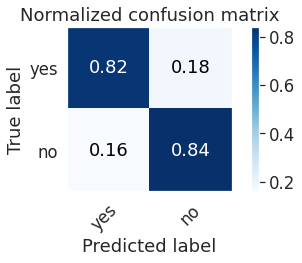

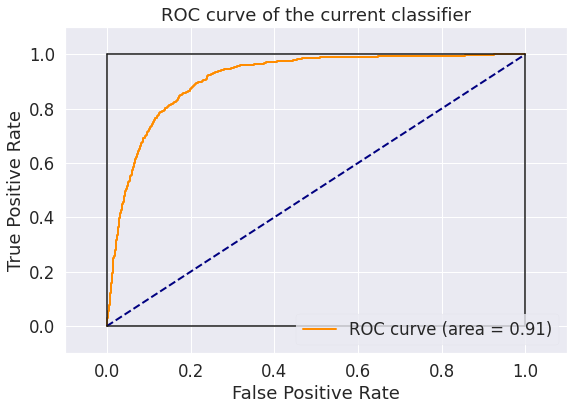

In [ ]:
# Third model (SVM) definition, definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

from sklearn.svm import SVC

svc = SVC(kernel='linear', class_weight='balanced', C=1, random_state=0, gamma=0.1)

svc, results.at[2, 'orgDataOptimal'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)


               precision    recall  f1-score   support

         yes       0.42      0.81      0.55       738
          no       0.97      0.85      0.91      5558

    accuracy                           0.84      6296
   macro avg       0.69      0.83      0.73      6296
weighted avg       0.91      0.84      0.86      6296

Dimensions of training data: (25184, 21)
Recall: 80.76%


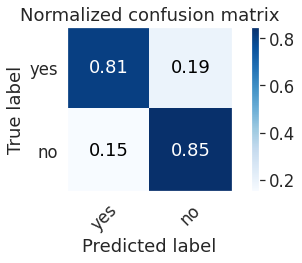

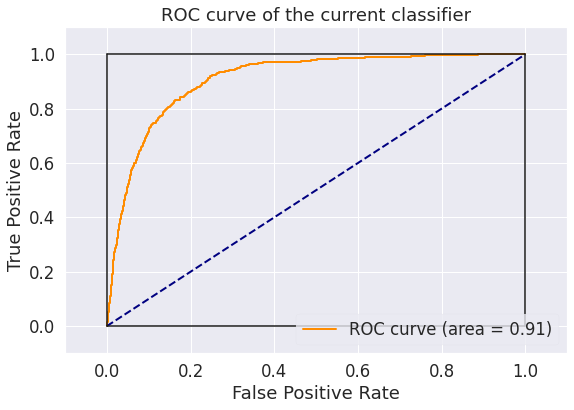

In [ ]:
# Third model (SVM) definition, training and evaluation
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

from sklearn.svm import SVC

svc = SVC(kernel='linear', class_weight='balanced', C=1, random_state=0, gamma=0.1)

svc, results.at[2, 'myColsOptimal'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)


               precision    recall  f1-score   support

         yes       0.38      0.81      0.52       738
          no       0.97      0.82      0.89      5558

    accuracy                           0.82      6296
   macro avg       0.67      0.82      0.70      6296
weighted avg       0.90      0.82      0.85      6296

Dimensions of training data: (25184, 28)
Recall: 80.89%


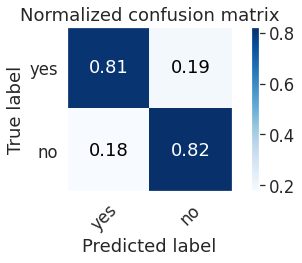

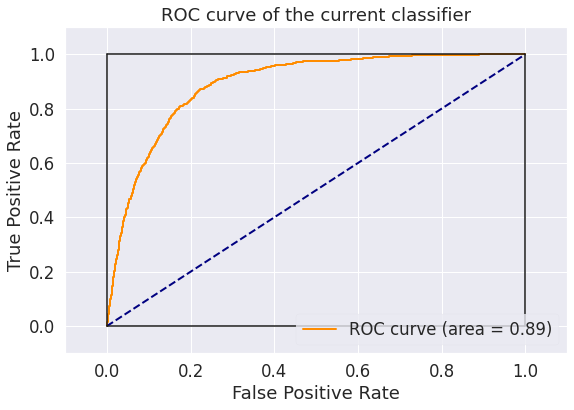

In [ ]:
# Third model (SVM) definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters
# using RFE feature selection (on Random Forest) (Running RFE on SVM is too expensive)


[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)


svc = SVC(kernel='linear', class_weight='balanced', C=1, random_state=0, gamma=0.1)

svc, results.at[2, 'orgDataOptimalRFE'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)

In [ ]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.03,80.76,82.38,81.44,80.35,,,
1,Random Forest,31.17,41.19,85.64,87.26,84.15,,,
2,Support Vector Machine,82.79,82.52,82.25,80.76,80.89,,,
3,Extra Trees,,,,,,,,
4,Gradient Boosting,,,,,,,,
5,Xgboost,,,,,,,,


### Model # 4: Extra Trees


               precision    recall  f1-score   support

         yes       0.63      0.32      0.42       738
          no       0.91      0.97      0.94      5558

    accuracy                           0.90      6296
   macro avg       0.77      0.65      0.68      6296
weighted avg       0.88      0.90      0.88      6296

Dimensions of training data: (25184, 47)
Recall: 31.71%


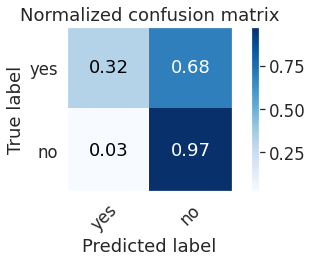

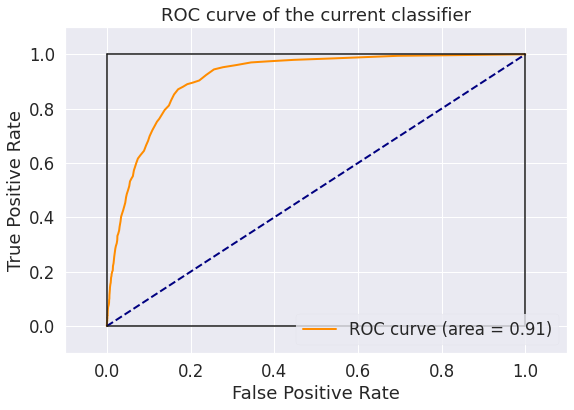

In [ ]:
# Fourth model (Extra Trees Classifier) definition, definition, training and evaluation
# on the original data (orgData)
# with default hyper parameters

from sklearn.ensemble import ExtraTreesClassifier as ETC

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

xTrees = ETC(random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'orgDataDefault'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

         yes       0.56      0.43      0.48       738
          no       0.93      0.96      0.94      5558

    accuracy                           0.89      6296
   macro avg       0.74      0.69      0.71      6296
weighted avg       0.88      0.89      0.89      6296

Dimensions of training data: (25184, 21)
Recall: 42.55%


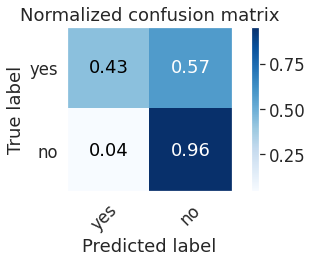

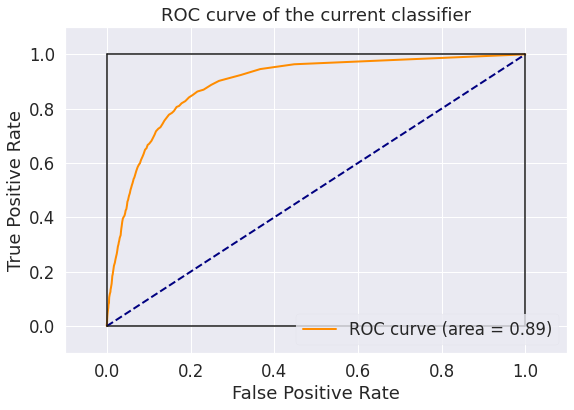

In [ ]:
# Fourth model (Extra Trees Classifier) definition, training and evaluation
# on previously selected features (myData)
# with default hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

xTrees = ETC(random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'myColsDefault'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)

In [ ]:
# GridSearchCV for tuning the parameters of the fourth model (Extra Trees Classifier)
# on myCols

[X_train, X_test, y_train, y_test] = myData(Data)

from sklearn.ensemble import ExtraTreesClassifier as ETC

clf = ETC(class_weight = 'balanced')

param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [5, 10, 15, 20],
    'min_samples_split': [5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

Best params for recall_score
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 100}


In [ ]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_n_estimators',
         'param_max_depth', 'param_min_samples_split', 'param_max_features']].round(3).head(10)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_n_estimators,param_max_depth,param_min_samples_split,param_max_features
97,0.42,0.81,0.85,100,20,20,sqrt
89,0.42,0.80,0.85,200,20,20,auto
96,0.42,0.80,0.85,50,20,20,sqrt
107,0.42,0.80,0.85,200,20,20,log2
105,0.42,0.80,0.85,50,20,20,log2
71,0.41,0.80,0.84,200,15,20,sqrt
98,0.42,0.80,0.85,200,20,20,sqrt
80,0.41,0.80,0.84,200,15,20,log2
106,0.42,0.80,0.85,100,20,20,log2
88,0.42,0.80,0.85,100,20,20,auto



               precision    recall  f1-score   support

         yes       0.46      0.74      0.57       738
          no       0.96      0.88      0.92      5558

    accuracy                           0.87      6296
   macro avg       0.71      0.81      0.74      6296
weighted avg       0.90      0.87      0.88      6296

Dimensions of training data: (25184, 47)
Recall: 74.25%


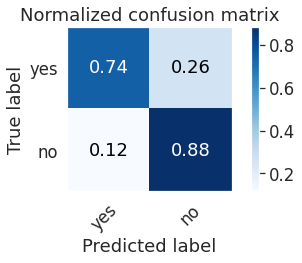

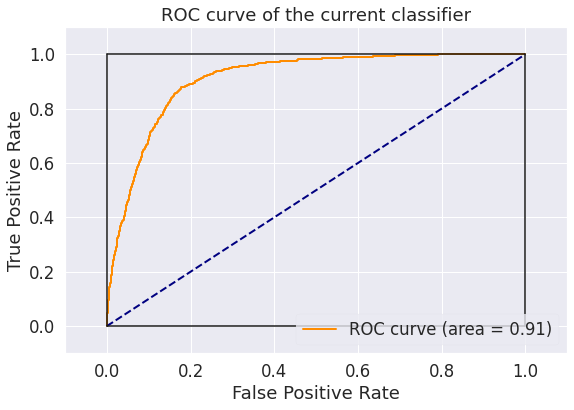

In [ ]:
# Fourth model (Extra Trees Classifier) definition, definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters

from sklearn.ensemble import ExtraTreesClassifier as ETC

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

xTrees = ETC(n_estimators=200, max_depth=20, max_features='log2', min_samples_split= 20,
                               random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'orgDataOptimal'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

         yes       0.44      0.83      0.57       738
          no       0.97      0.86      0.91      5558

    accuracy                           0.86      6296
   macro avg       0.71      0.84      0.74      6296
weighted avg       0.91      0.86      0.87      6296

Dimensions of training data: (25184, 21)
Recall: 82.66%


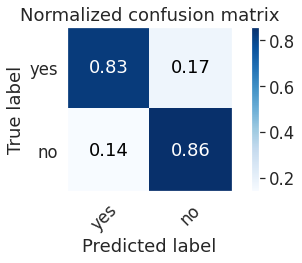

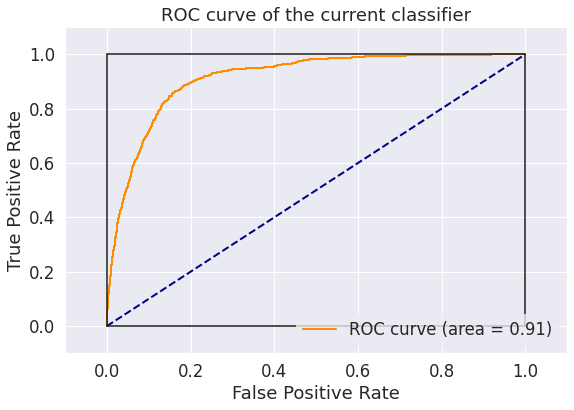

In [ ]:
# Fourth model (Extra Trees Classifier) definition, training and evaluation
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

xTrees = ETC(n_estimators=200, max_depth=20, max_features='log2', min_samples_split= 20,
                               random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'myColsOptimal'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

         yes       0.45      0.78      0.57       738
          no       0.97      0.87      0.92      5558

    accuracy                           0.86      6296
   macro avg       0.71      0.83      0.75      6296
weighted avg       0.91      0.86      0.88      6296

Dimensions of training data: (25184, 28)
Recall: 78.05%


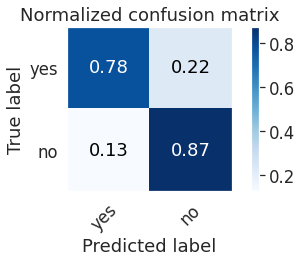

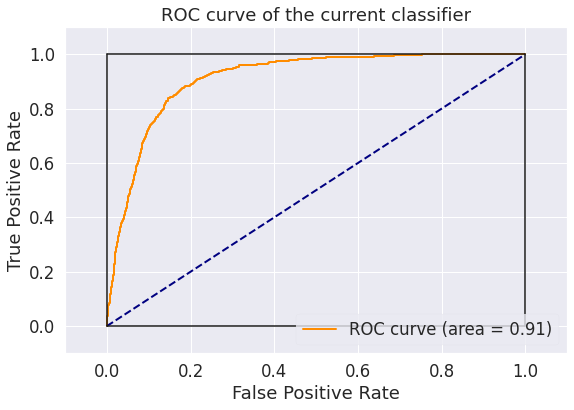

In [ ]:
# Fourth model (Extra Trees Classifier) definition, definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters
# using RFE feature selection (on Random Forest) (Running RFE on ETC is too expensive)

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)

xTrees = ETC(n_estimators=200, max_depth=20, max_features='log2', min_samples_split= 20,
                               random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'orgDataOptimalRFE'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)

In [ ]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.03,80.76,82.38,81.44,80.35,,,
1,Random Forest,31.17,41.19,85.64,87.26,84.15,,,
2,Support Vector Machine,82.79,82.52,82.25,80.76,80.89,,,
3,Extra Trees,31.71,42.55,74.25,82.66,78.05,,,
4,Gradient Boosting,,,,,,,,
5,Xgboost,,,,,,,,


### Model # 5: Gradient Boosting

Gradient Boosting is a sequential process and thus every time it makes an incorrect prediction, it focuses more on that incorrectly predicted data point. So, if the first iteration gave you an accuracy of 80 %, the second iteration would focus on the remaining 20%.

Since Garient Boosting Classifier has no **class_weight** parameter to be able to handle **class imbalance problem**, we use our balanced data (smoteData) on it:


               precision    recall  f1-score   support

         yes       0.50      0.74      0.59       738
          no       0.96      0.90      0.93      5558

    accuracy                           0.88      6296
   macro avg       0.73      0.82      0.76      6296
weighted avg       0.91      0.88      0.89      6296

Dimensions of training data: (44444, 47)
Recall: 73.58%


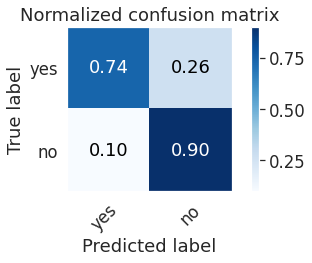

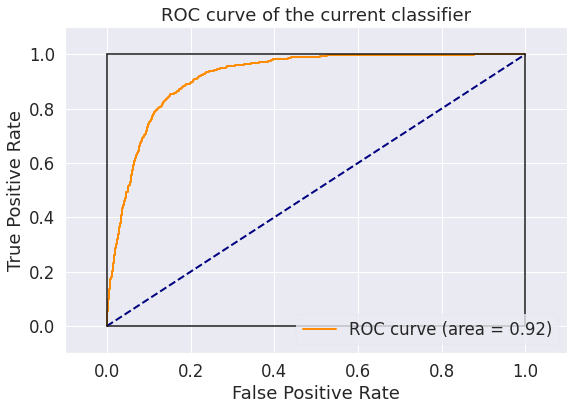

In [ ]:
# Fifth model (Gradient Boosting Classifier) definition, definition, training and evaluation
# on the balanced Data (smoteData)
# with default hyper parameters

from sklearn.ensemble import GradientBoostingClassifier as GBC

[X_train, X_test, y_train, y_test] = smoteData(Data)

gBoosting = GBC(random_state=0)

gBoosting,  results.at[4, 'smoteDataDefault'] = train_and_evaluate(gBoosting, X_train, y_train, X_test, y_test)

plotROC(gBoosting, X_train, y_train, X_test, y_test)

In [ ]:
# GridSearchCV for tuning the parameters of the fifth model (Gradient Boosting Classifier)
# on smoteData

[X_train, X_test, y_train, y_test] = smoteData(Data)

from sklearn.ensemble import GradientBoostingClassifier as GBC

stage = 4

if stage == 1:
    # In order to decide on boosting parameters, we need to set some 'initial values' of other parameters.
    # all of these values are just initial estimates and will be tuned later.
    # min_samples_split => 0.5~1% of total samples
    # min_sample_leaf = 50 => selected based on intuition
    # max_depth = 5 => Should be chosen (5-8) based on the number of samples and features
    # max_featres = 'sqrt'
    # subsample = 0.8 => commonly used start value
    # random_state = 10 => shoulb be always the same for keeping he results comparible in different executions
    # learning_rate = 0.1 => default value

    # Here, we try to choose some initial values for parameters that do not decrease the recall score that we had
    # with the default values of the parameters
    clf = GBC(min_samples_split=200, min_samples_leaf=20, max_depth=5, max_features='sqrt',
                subsample=0.8, random_state=10, learning_rate=0.1)

    # Now, we check the optimum number of trees.
    # For this purpose, we can do a grid search and test out values from 20 to 100 in steps of 10.
    param_grid = {
        'n_estimators' : range(20,201,10) # 150
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 2:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = GBC(learning_rate=0.1, n_estimators=90, max_features='sqrt', subsample=0.8, random_state=10)

    param_grid = {
        'max_depth' : range(5,16,5), # 5
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 3:
    clf = GBC(max_depth=5, learning_rate=0.1, n_estimators=90,
              max_features='sqrt', subsample=0.8, random_state=10)

    param_grid = {
        'min_samples_split' : range(200,1001,200), #300
        'min_samples_leaf' : range(30,71,10) # 50
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 4:
    clf = GBC(max_features='sqrt', min_samples_leaf= 50, min_samples_split=400, max_depth=5, learning_rate=0.1, n_estimators=90
              , random_state=10)

    param_grid = {
        'subsample' : [0.6,0.7,0.75,0.8,0.85,0.9] # 0.75
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')


Best params for recall_score
{'subsample': 0.8}


In [ ]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_subsample']].round(3)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_subsample
3,0.90,-0.93,0.91,0.80
0,0.90,-0.93,0.91,0.60
5,0.90,-0.93,0.91,0.90
2,0.90,-0.93,0.91,0.75
4,0.90,-0.93,0.91,0.85
1,0.90,-0.93,0.91,0.70



               precision    recall  f1-score   support

         yes       0.42      0.82      0.55       738
          no       0.97      0.85      0.91      5558

    accuracy                           0.84      6296
   macro avg       0.69      0.83      0.73      6296
weighted avg       0.91      0.84      0.86      6296

Dimensions of training data: (44444, 47)
Recall: 82.38%


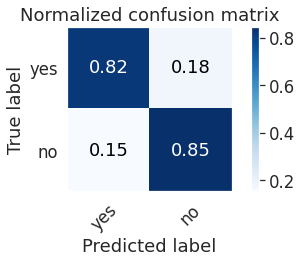

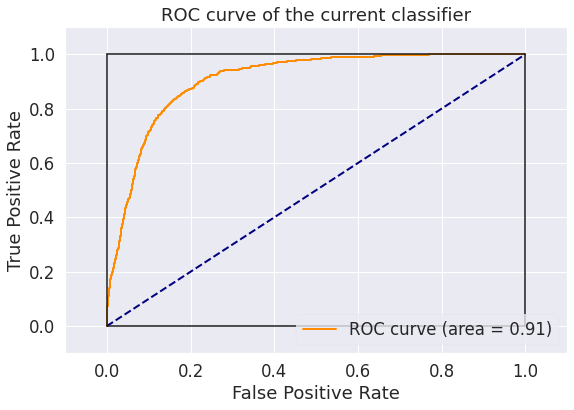

In [ ]:
# Fifth model (Gradient Boosting Classifier) definition, definition, training and evaluation
# on the balanced Data (smoteData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = smoteData(Data)

gBoosting = GBC(max_features='sqrt', min_samples_leaf= 50, min_samples_split=300, max_depth=5, learning_rate=0.01
                , n_estimators=150, subsample=0.75, random_state=10)

gBoosting,  results.at[4, 'smoteDataOptimal'] = train_and_evaluate(gBoosting, X_train, y_train, X_test, y_test)

plotROC(gBoosting, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

         yes       0.41      0.80      0.54       738
          no       0.97      0.85      0.90      5558

    accuracy                           0.84      6296
   macro avg       0.69      0.82      0.72      6296
weighted avg       0.90      0.84      0.86      6296

Dimensions of training data: (44444, 28)
Recall: 80.22%


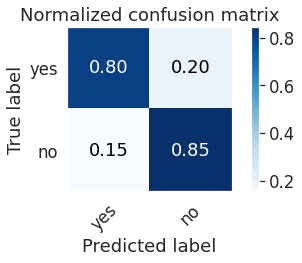

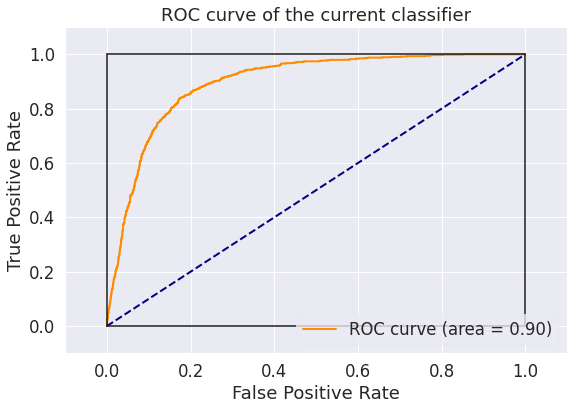

In [ ]:
# Fifth model (Gradient Boosting Classifier) definition, training and evaluation
# on the balanced Data (smoteData)
# with optimal hyper parameters
# using RFE feature selection (on Random Forest) (Running RFE on Gradient Boosting Classifier is too expensive)

[X_train, X_test, y_train, y_test] = smoteData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)

gBoosting = GBC(max_features='sqrt', min_samples_leaf= 50, min_samples_split=300, max_depth=5, learning_rate=0.01
                , n_estimators=150, subsample=0.75, random_state=10)

gBoosting,  results.at[4, 'smoteDataOptimalRFE'] = train_and_evaluate(gBoosting, X_train, y_train, X_test, y_test)

plotROC(gBoosting, X_train, y_train, X_test, y_test)

In [ ]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.03,80.76,82.38,81.44,80.35,,,
1,Random Forest,31.17,41.19,85.64,87.26,84.15,,,
2,Support Vector Machine,82.79,82.52,82.25,80.76,80.89,,,
3,Extra Trees,31.71,42.55,74.25,82.66,78.05,,,
4,Gradient Boosting,,,,,,73.58,82.38,80.22
5,Xgboost,,,,,,,,


### Model # 6: XGBoost

Since XGBoost Classifier has no **class_weight** parameter to be able to handle **class imbalance problem**, we use our balanced data (smoteData) on it:

[05:24:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

               precision    recall  f1-score   support

         yes       0.61      0.56      0.59       738
          no       0.94      0.95      0.95      5558

    accuracy                           0.91      6296
   macro avg       0.78      0.76      0.77      6296
weighted avg       0.90      0.91      0.91      6296

Dimensions of training data: (44444, 47)
Recall: 56.10%


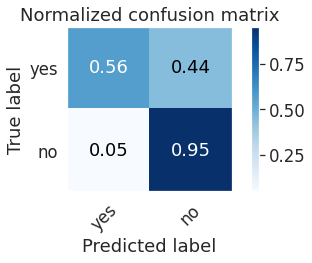

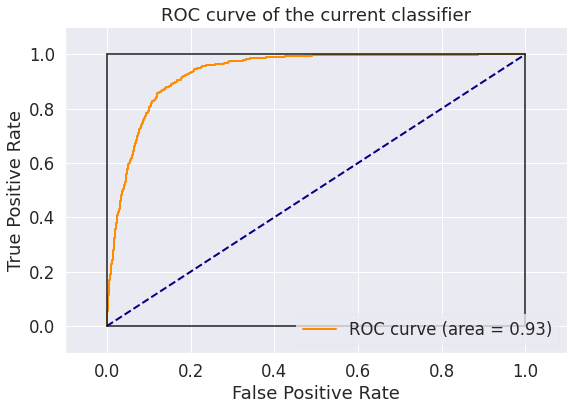

In [ ]:
# Sixth model (Xgboost) definition, definition, training and evaluation
# on the balanced Data (smoteData)
# with default hyper parameters

from xgboost import XGBClassifier

[X_train, X_test, y_train, y_test] = smoteData(Data)

xgb = XGBClassifier(random_state=0)

xgb,  results.at[5, 'smoteDataDefault'] = train_and_evaluate(xgb, X_train, y_train, X_test, y_test)

plotROC(xgb, X_train, y_train, X_test, y_test)

In [ ]:
# GridSearchCV for tuning the parameters of the sixth model (XGBoost Classifier)
# on the balanced Data (smoteData)

[X_train, X_test, y_train, y_test] = smoteData(Data)

from xgboost import XGBClassifier

stage = 6

if stage == 1:
    # In order to decide on boosting parameters, we need to set some 'initial values' of other parameters.
    # all of these values are just initial estimates and will be tuned later.

    # Here, we try to choose some initial values for parameters that do not decrease the recall score that we had
    # with the default values of the parameters
    clf = XGBClassifier(objective= 'binary:logistic', random_state=0)

    # Now, we check the optimum number of trees.
    # For this purpose, we can do a grid search and test out values from 20 to 100 in steps of 20.
    param_grid = {
        'n_estimators' : range(10, 101, 20) # 90
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 2:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = XGBClassifier(objective= 'binary:logistic', n_estimators=90)

    param_grid = {
        'max_depth' : range(2,10,1) # 2
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 3:
    clf = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2)

    param_grid = {
        'min_child_weight':range(1,10,1) # No difference (default value works well, do not add this parameter)
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 4:
    clf = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2)

    param_grid = {
        'gamma':[i/10.0 for i in range(0,5)] # No difference (default value works well, do not add this parameter)
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 5:
    clf = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2)

    param_grid = {
        #'subsample':[i/10.0 for i in range(6,10)], # No difference (default value works well, do not add this parameter)
        'colsample_bytree':[i/10.0 for i in range(6,10)] # 0.6
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 6:
    clf = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2, colsample_bytree=0.6)

    param_grid = {
        'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05] # 0.05
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

[05:27:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best params for recall_score
{'reg_alpha': 0}


In [ ]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_reg_alpha']].round(3)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_reg_alpha
0,0.92,0.91,0.92,0
1,0.92,0.91,0.92,0.00
2,0.92,0.91,0.92,0.01
3,0.92,0.91,0.92,0.01
4,0.92,0.91,0.92,0.05


[05:27:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

               precision    recall  f1-score   support

         yes       0.30      0.84      0.44       738
          no       0.97      0.74      0.84      5558

    accuracy                           0.75      6296
   macro avg       0.64      0.79      0.64      6296
weighted avg       0.89      0.75      0.79      6296

Dimensions of training data: (44444, 47)
Recall: 83.60%


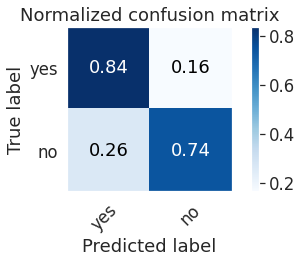

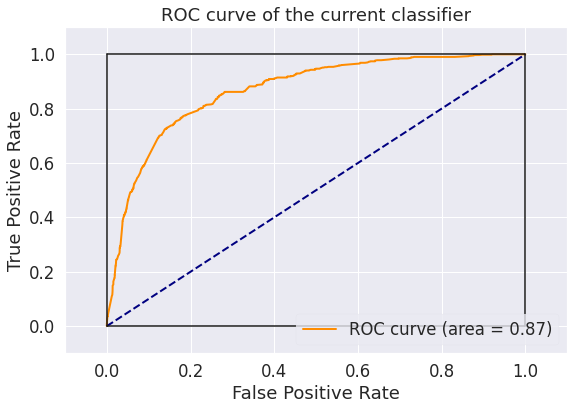

In [ ]:
# Sixth model (Xgboost) definition, training and evaluation
# on the balanced Data (smoteData)
# with optimal hyper parameters
# increasing reg_alpha from 0.05 to 2 without recall loss to force classifier to do more feature selection

from xgboost import XGBClassifier

[X_train, X_test, y_train, y_test] = smoteData(Data)

xgb = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2, colsample_bytree=0.6, reg_alpha=2
                   , learning_rate=0.011)

xgb,  results.at[5, 'smoteDataOptimal'] = train_and_evaluate(xgb, X_train, y_train, X_test, y_test)

plotROC(xgb, X_train, y_train, X_test, y_test)

[05:27:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

               precision    recall  f1-score   support

         yes       0.34      0.80      0.47       738
          no       0.97      0.79      0.87      5558

    accuracy                           0.79      6296
   macro avg       0.65      0.80      0.67      6296
weighted avg       0.89      0.79      0.82      6296

Dimensions of training data: (44444, 28)
Recall: 80.22%


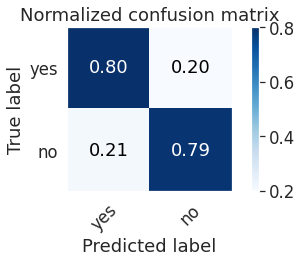

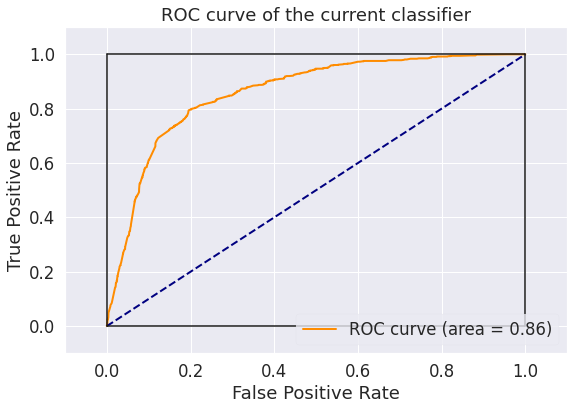

In [ ]:
# Sixth model (Xgboost) definition, training and evaluation
# on the balanced Data (smoteData)
# with optimal hyper parameters
# using RFE feature selection (on Random Forest) (Running RFE on Xgboost classifier is too expensive)

[X_train, X_test, y_train, y_test] = smoteData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)

xgb = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2, colsample_bytree=0.6, reg_alpha=2
                   , learning_rate=0.011)

gBoosting,  results.at[5, 'smoteDataOptimalRFE'] = train_and_evaluate(xgb, X_train, y_train, X_test, y_test)

plotROC(xgb, X_train, y_train, X_test, y_test)

In [ ]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.03,80.76,82.38,81.44,80.35,,,
1,Random Forest,31.17,41.19,85.64,87.26,84.15,,,
2,Support Vector Machine,82.79,82.52,82.25,80.76,80.89,,,
3,Extra Trees,31.71,42.55,74.25,82.66,78.05,,,
4,Gradient Boosting,,,,,,73.58,82.38,80.22
5,Xgboost,,,,,,56.10,83.60,80.22


### Running the best Model on the test data:

In [ ]:
# reading the test data from csv file:
tData = pd.read_csv('../input/marketing-campaign-analysis-data/test.csv')
tData.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432176974,NaN,5,may,283,69546777,35,male,manager,married,uniGraduated,no,76,no,no,cellPhone,1,362.00,9,failure
1,432157692,NaN,18,jul,111,69546887,31,male,manager,married,uniGraduated,no,557,yes,no,cellPhone,1,NaN,0,unknown
2,432170850,NaN,29,jan,475,69550874,26,male,technical,single,uniGraduated,no,1274,no,no,landline,2,NaN,0,unknown
3,432151613,NaN,5,jun,209,69560082,26,male,worker,married,highSchool,no,986,yes,no,unknown,3,NaN,0,unknown
4,432167744,NaN,18,nov,459,69561716,32,male,worker,single,highSchool,no,3845,yes,no,cellPhone,3,NaN,0,unknown


In [ ]:
# Dropping the 'Zilevariable' that has no data:
tData.drop(['target'], axis=1, inplace=True);

In [ ]:
tData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13731 entries, 0 to 13730
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13731 non-null  int64  
 1   day                           13731 non-null  int64  
 2   month                         13731 non-null  object 
 3   duration                      13731 non-null  int64  
 4   contactId                     13731 non-null  int64  
 5   age                           13731 non-null  int64  
 6   gender                        13731 non-null  object 
 7   job                           13731 non-null  object 
 8   maritalStatus                 13731 non-null  object 
 9   education                     13731 non-null  object 
 10  creditFailure                 13731 non-null  object 
 11  accountBalance                13731 non-null  int64  
 12  house                         13731 non-null  object 
 13  c

In [ ]:
# Next, we take a look to see if there is any missing data in our Training data:
missing_data = pd.DataFrame({'total_missing': tData.isnull().sum(), 'perc_missing': (tData.isnull().sum()/len(tData))*100}).round(2)

# Print some summary information
print ("Our dataframe has " + str(tData.shape[1]) + " column(s).\n"
        "There is/are " + str(len(missing_data.loc[missing_data['total_missing'] > 0])) +
              " column(s) that has/have missing values.")
missing_data

Our dataframe has 19 column(s).
There is/are 1 column(s) that has/have missing values.


,total_missing,perc_missing
id,0,0.00
day,0,0.00
month,0,0.00
duration,0,0.00
contactId,0,0.00
age,0,0.00
gender,0,0.00
job,0,0.00
maritalStatus,0,0.00
education,0,0.00


In [ ]:
tData['daySinceLastCampaign'].fillna(-1, inplace=True)

In [ ]:
missing_data = pd.DataFrame({'total_missing': tData.isnull().sum(), 'perc_missing': (tData.isnull().sum()/len(tData))*100}).round(2)
missing_data

,total_missing,perc_missing
id,0,0.00
day,0,0.00
month,0,0.00
duration,0,0.00
contactId,0,0.00
age,0,0.00
gender,0,0.00
job,0,0.00
maritalStatus,0,0.00
education,0,0.00


In [ ]:
### Monat one-hot Encoding ###

# Get one hot encoding of columns 'Monat'
month_one_hot = pd.get_dummies(tData.month)
# Drop column 'Monat' as it is now encoded
tData.drop('month',axis = 1, inplace=True)
# Join the encoded Monat fields
tData = tData.join(month_one_hot)

In [ ]:
###  one-hot encoding of the fields:
### 'job', 'maritalStatus', 'education', 'contactType' & 'lastCampaignResult'

# make a difference between 'job_unknown', 'education_unknown' and 'contactType_unknown'
tData.loc[tData['job'] == 'unknown', 'job'] = 'job_unknown'
tData.loc[tData['education'] == 'unknown', 'education'] = 'education_unknown'
tData.loc[tData['contactType'] == 'unknown', 'contactType'] = 'contactType_unknown'

# for more clarification of values in 'lastCampaignResult' field we change them as follows
tData.loc[tData['lastCampaignResult'] == 'unknown', 'lastCampaignResult'] = 'lastCampaignResult_unknown'
tData.loc[tData['lastCampaignResult'] == 'failure', 'lastCampaignResult'] = 'lastCampaignResult_failure'
tData.loc[tData['lastCampaignResult'] == 'other'  , 'lastCampaignResult'] = 'lastCampaignResult_other'
tData.loc[tData['lastCampaignResult'] == 'success', 'lastCampaignResult'] = 'lastCampaignResult_success'


columns = ['job', 'maritalStatus', 'education', 'contactType', 'lastCampaignResult']

for col in columns:
    # Get one hot encoding of the column
    col_one_hot = pd.get_dummies(tData[col])
    # Drop column as it is now encoded
    tData.drop(col,axis = 1, inplace=True)
    # Join the encoded Monat fields
    tData = tData.join(col_one_hot)

In [ ]:
# Variable Encoding of the fields 'gender', 'creditFailure', 'credit', 'house' as we did for 'target' before

Geschlecht_conversion = {"gender": {"female": 0, "male": 1}}
tData.replace(Geschlecht_conversion, inplace=True)

columns = ['creditFailure', 'credit', 'house']

for col in columns:
    conversion = {col: {"no": 0, "yes": 1}}
    tData.replace(conversion, inplace=True)

In [ ]:
# dropping ID-like columns
IDs = tData['id']
tData.drop(['id'], axis = 1, inplace = True)
tData.drop(['contactId'], axis = 1, inplace = True)

In [ ]:
# removing multi colinear features
tData.drop(['uniGraduated'], axis = 1, inplace = True)
tData.drop(['lastCampaignResult_unknown'], axis = 1, inplace = True)

In [ ]:
# applying the same normalizazion process on the test data

tCols = tData.columns

tData = scaler.transform(tData)

tData = pd.DataFrame(tData, columns=tCols);

In [ ]:
# decreasing binary features type accuracy for a more efficient memory usage
for col in tData.columns:
    if len(tData[col].unique()) == 2:
        tData[col]= tData[col].astype('uint8')


               precision    recall  f1-score   support

         yes       0.38      0.86      0.53       738
          no       0.98      0.82      0.89      5558

    accuracy                           0.82      6296
   macro avg       0.68      0.84      0.71      6296
weighted avg       0.91      0.82      0.85      6296

Dimensions of training data: (25184, 47)
Recall: 85.64%


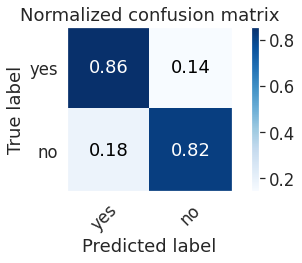

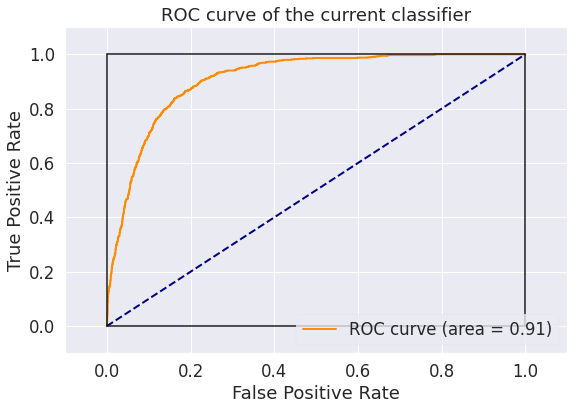

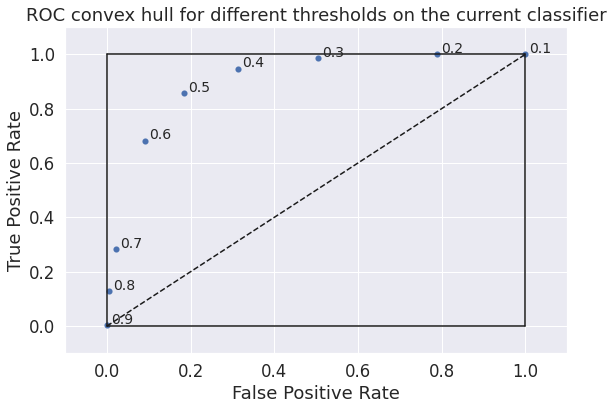

In [ ]:
# preparing the best experienced model
model = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0,
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

# data preparation
[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

# training the model
model.fit(X_train,y_train)

# recheck the model performance on the training data
y_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=np.array(['yes', 'no']), normalize=True)
plt.grid(None)
print('\n', classification_report(y_test, y_pred, target_names=np.array(['yes', 'no']), labels = [1, 0]))

print("Dimensions of training data: {}" .format(X_train.shape))

recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

plotROC(model, X_train, y_train, X_test, y_test)

checkThresh(model, X_test, y_test, typ = 1, prt=0)

In [ ]:
# Taking the probabilities of the test data
finalProbs = model.predict_proba(tData)

# taking the probabilities of the second label (positive answer of the customers to the campaign)
res = finalProbs[:,1]

# Stammnummer of the test samples
IDs_ = IDs.values

# creating a dataframe, saving the information inside it and save it into a csv file
tOutput = pd.DataFrame(columns=['ID', 'Expected'])
tOutput['ID'] = IDs_
tOutput['Expected'] = res
tOutput.to_csv('tOutput.csv', index=False)